# EDA - Exploratory Data Analysis


## Importar Librerías

Se importan las librerías esenciales para facilitar el análisis que abarca la carga de datos, la evaluación estadística, la visualización, la transformación de datos, la fusión y la unión.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

---

Se Instala el paquete `ucimlrepo` desde PyPI (Python Package Index).  
Este paquete permite acceder a datasets del repositorio UCI Machine Learning.

In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


## Lectura de Datos

Se Importa la función `fetch_ucirepo` del paquete `ucimlrepo`.  
`fetch_ucirepo` es la función clave para descargar datasets usando su ID único.

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 

df = pd.concat([X, y], axis=1) 

{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

---

Se muestran las primeras filas del DataFrame con todos los detalles.  
Se usa `.to_string()` para evitar el truncamiento de columnas y lograr mostrar todas las variables.

In [5]:
print(df.head().to_string())

   Marital Status  Application mode  Application order  Course  Daytime/evening attendance  Previous qualification  Previous qualification (grade)  Nacionality  Mother's qualification  Father's qualification  Mother's occupation  Father's occupation  Admission grade  Displaced  Educational special needs  Debtor  Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  International  Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  Curricular units 1st sem (evaluations)  Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  Curricular units 1st sem (without evaluations)  Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (evaluations)  Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  Curricular units 2nd sem (without evaluations)  Unemployment rate  Inflation rate   GDP    Target
0               1                17                  5     171                     

---

Se muestran las últimas filas del DataFrame con todos los detalles.  
Se usa `.to_string()` para evitar el truncamiento de columnas y lograr mostrar todas las variables.

In [6]:
print(df.tail().to_string())

      Marital Status  Application mode  Application order  Course  Daytime/evening attendance  Previous qualification  Previous qualification (grade)  Nacionality  Mother's qualification  Father's qualification  Mother's occupation  Father's occupation  Admission grade  Displaced  Educational special needs  Debtor  Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  International  Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  Curricular units 1st sem (evaluations)  Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  Curricular units 1st sem (without evaluations)  Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (evaluations)  Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  Curricular units 2nd sem (without evaluations)  Unemployment rate  Inflation rate   GDP    Target
4419               1                 1                  6    9773               

---

Se presenta un resumen detallado de todas las variables del dataset, incluyendo su rol (predictora o objetivo), el tipo de dato (entero, categórico, punto flotante) y la identificación de valores faltantes, lo que permite evaluar la integridad y estructura de los datos para su posterior procesamiento.

In [7]:
# variable information 
print(predict_students_dropout_and_academic_success.variables)

                                              name     role         type  \
0                                   Marital Status  Feature      Integer   
1                                 Application mode  Feature      Integer   
2                                Application order  Feature      Integer   
3                                           Course  Feature      Integer   
4                       Daytime/evening attendance  Feature      Integer   
5                           Previous qualification  Feature      Integer   
6                   Previous qualification (grade)  Feature   Continuous   
7                                      Nacionality  Feature      Integer   
8                           Mother's qualification  Feature      Integer   
9                           Father's qualification  Feature      Integer   
10                             Mother's occupation  Feature      Integer   
11                             Father's occupation  Feature      Integer   
12          

**Interpretación del Dataset**

Este resumen del conjunto de datos indica que es una colección exhaustiva de información sobre estudiantes, con el objetivo principal de identificar a los estudiantes en riesgo en una etapa temprana de su trayectoria académica, de modo que se puedan implementar estrategias de apoyo. Los datos combinan características personales, socioeconómicas y académicas, lo que permite un análisis multifacético de los factores que influyen en el rendimiento de los estudiantes.

- Variables demográficas y personales: Estas incluyen datos como el estado civil, la edad al matricularse, el género, la nacionalidad y si el estudiante es internacional. Estas características son importantes para comprender la composición de la población estudiantil y cómo los factores personales pueden estar relacionados con el éxito académico.

- Variables socioeconómicas: Este grupo abarca el nivel educativo y la ocupación de los padres, si el estudiante es becario, si es deudor o si sus matrículas están al día. También incluye indicadores macroeconómicos como la tasa de desempleo, la tasa de inflación y el GDP. Estas variables ofrecen información valiosa sobre el entorno socioeconómico de los estudiantes y cómo las condiciones externas pueden afectar su rendimiento.

- Variables académicas y de admisión: Aquí se encuentran los detalles del proceso de admisión, como el modo y orden de la solicitud, la calificación de admisión y la calificación de la titulación previa. También se incluyen datos detallados del rendimiento académico en los dos primeros semestres, como el número de créditos aprobados, el número de unidades curriculares inscritas y la calificación media de cada semestre. Estos datos son cruciales para evaluar el progreso académico y detectar posibles problemas desde el principio. 

La ausencia de valores faltantes facilita el análisis, y las descripciones detalladas de cada campo ayudan a contextualizar su relevancia académica. 

---

Se calcula el número de valores únicos para cada variable del DataFrame.

In [8]:
df.nunique()

Marital Status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

**Interpretación de los Valores Únicos**

El número de valores únicos en cada variable revela su tipo y la granularidad de los datos. Una cantidad baja de valores únicos indica una variable categórica o binaria, mientras que una cantidad alta sugiere una variable continua o con una amplia variedad de categorías.

- Variables binarias o categóricas de bajo nivel  
Las variables con 2 valores únicos son típicamente binarias, lo que significa que solo tienen dos estados posibles. Esto se observa en variables como:
    - Asistencia diurna/nocturna: Diferencia a los estudiantes en dos grupos.
    - Desplazado, Deudor, Necesidades educativas especiales, Becario, Internacional: Variables que indican la presencia o ausencia de una característica específica (Si/No).
    - Género: Distingue entre dos categorías de género.
    - Matrículas al día: Indica si los pagos están completos o no.

- Variables categóricas de nivel medio  
Las variables con un rango de entre 3 y 46 valores únicos son categóricas. Estas variables permiten la segmentación de la población estudiantil en grupos más diversos. Ejemplos notables incluyen:
    - Estado civil (6 valores): Proporciona varias categorías para el estado civil.
    - Nacionalidad (21 valores): Permite analizar el rendimiento por país de origen.
    - Curso (17 valores): Posibilita comparar el desempeño en diferentes programas de estudio.
    - Ocupación de la madre y del padre (32 y 46 valores, respectivamente): Ofrece una visión detallada de los antecedentes laborales de los padres.

La variable Objetivo (3 valores) es un caso especial y muy importante. Sus 3 valores únicos confirman que el problema es de clasificación multicategoría, para predecir si un estudiante abandonará, se graduará o continuará.

- Variables continuas o con alta granularidad  
Las variables con un número elevado de valores únicos, como más de 100, suelen ser de tipo continuo o tener una alta granularidad. Estas variables son cruciales para un análisis detallado y matizado:
    - Calificación de admisión (620 valores): Indica una amplia gama de puntuaciones de entrada.
    - Calificación de la titulación previa (101 valores): Muestra la diversidad en las notas obtenidas por los estudiantes en su educación anterior.
    - Calificación media del 1er y 2º semestre (797 y 782 valores, respectivamente): Estas variables son fundamentales para medir el rendimiento académico de manera precisa, ya que cada estudiante puede tener un promedio de notas único.
    - Edad al matricularse (46 valores): Muestra una distribución variada de edades de los estudiantes.

El conjunto de datos es rico y diversificado, con una combinación equilibrada de variables binarias, categóricas y continuas. Esta diversidad lo hace muy adecuado para realizar un análisis predictivo y descriptivo que identifique patrones y factores clave que influyen en el resultado final del estudiante, ya sea que continúe, abandone o se gradúe.



## Análisis Univariado

El Análisis Univariado es la primera fase del análisis exploratorio de datos. Se enfoca en el estudio individual de cada variable para entender su distribución, características y valores atípicos. Esto permite identificar patrones y la calidad de los datos antes de un análisis más complejo.

### Variables Binarias

A continuación, se genera un doble gráfico para cada variable binaria, permitiendo comparar su distribución mediante:

1. Gráfico de Barras:  
- Muestra el conteo absoluto de cada categoría (0 y 1).  
- Ideal para comparar magnitudes visualmente.
    
2. Gráfico de Torta:  
- Muestra la proporción porcentual de cada categoría.  
- Útil para entender el balance/imbalance entre clases.

Column: Daytime/evening attendance


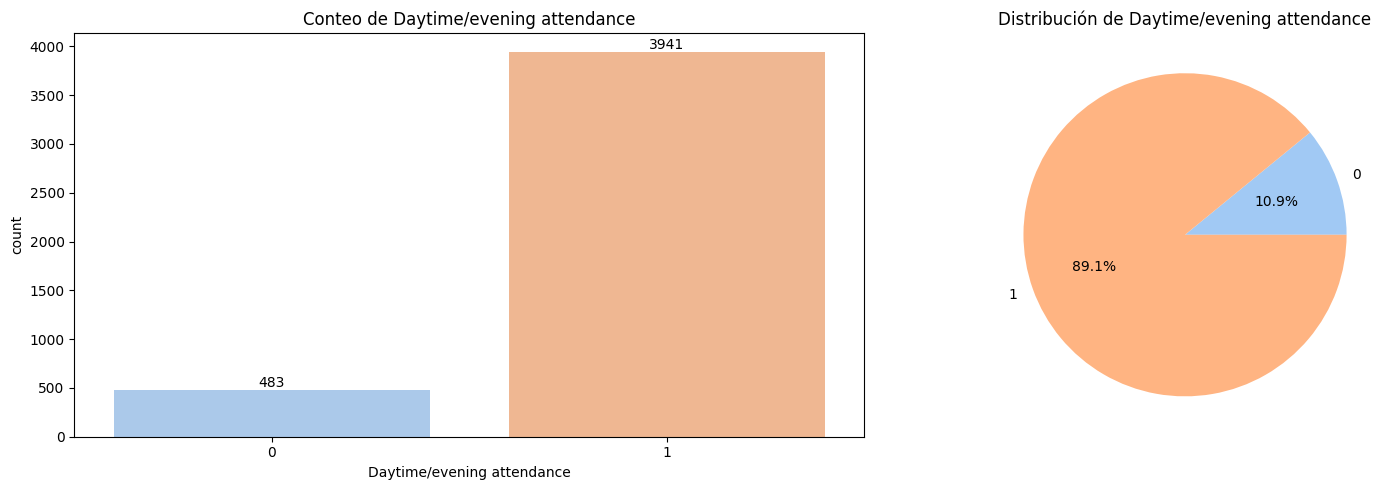

Column: Displaced


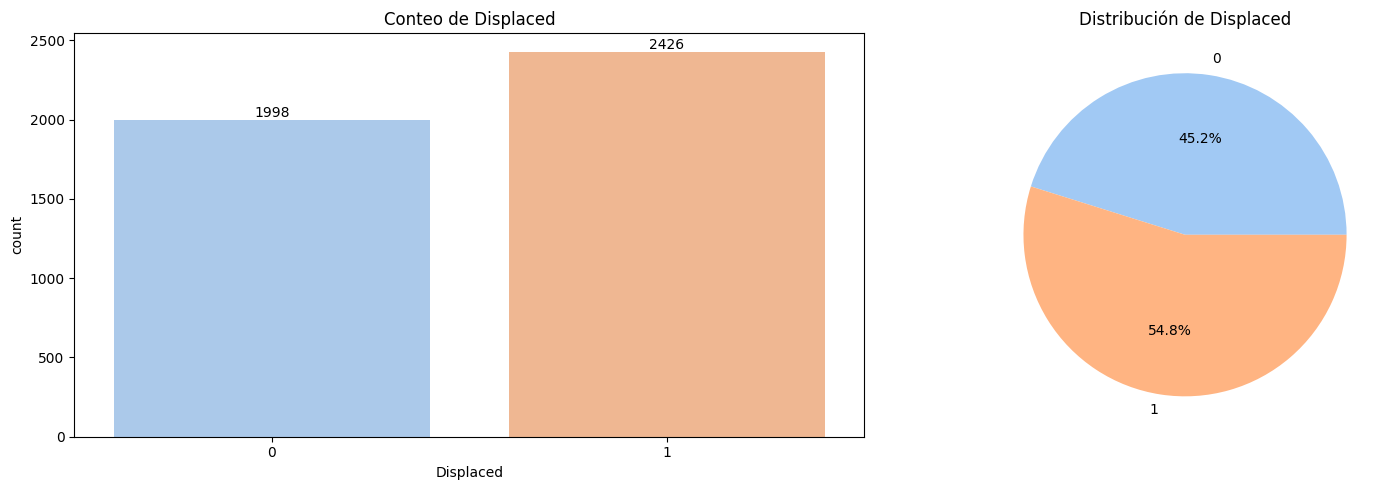

Column: Educational special needs


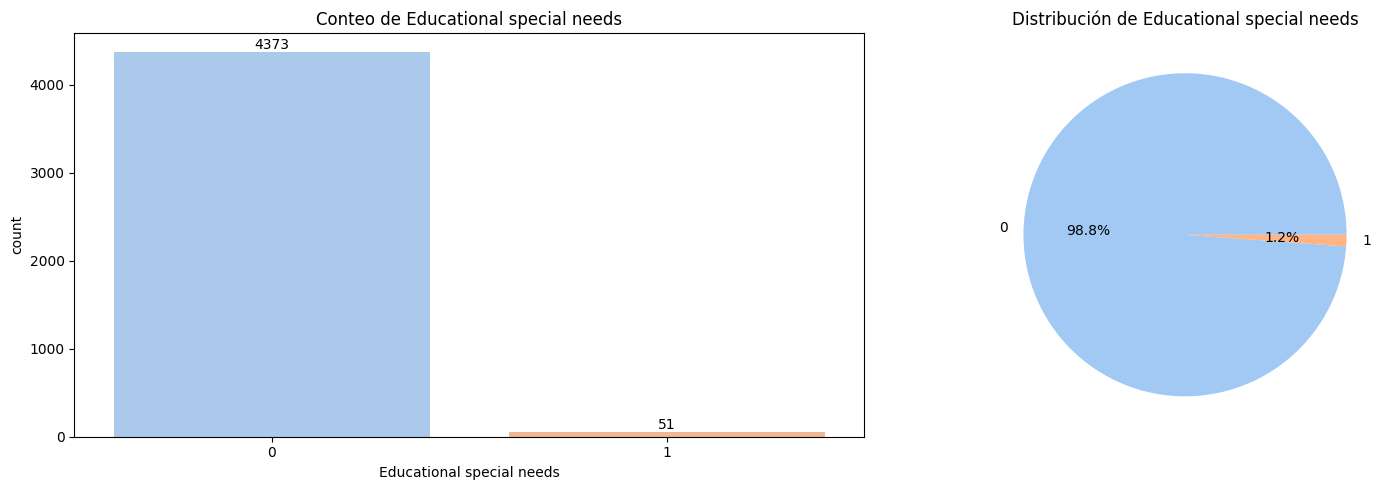

Column: Debtor


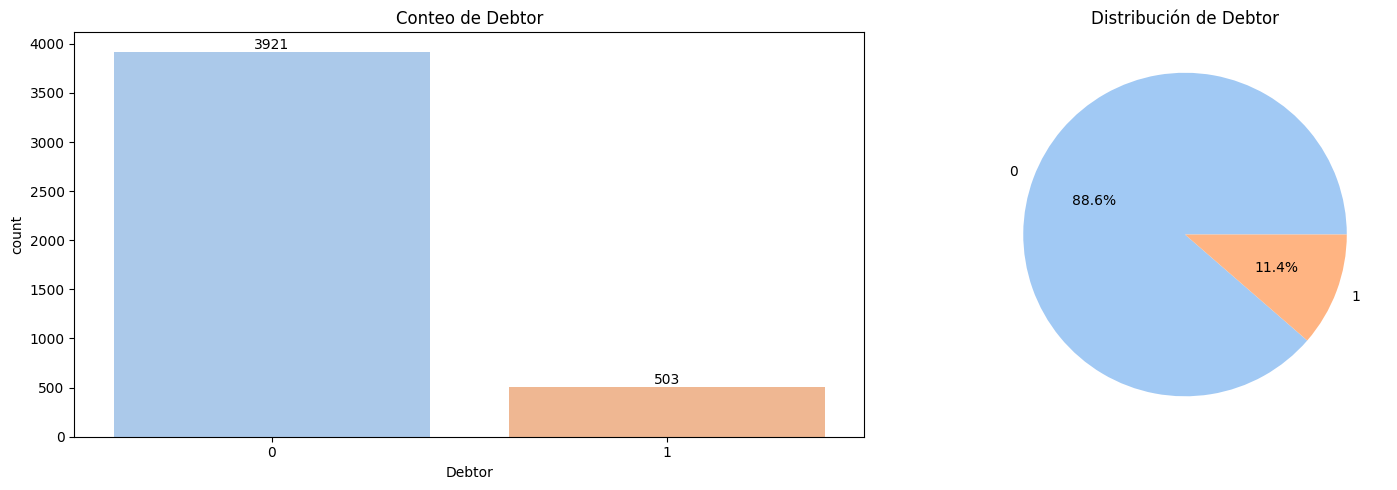

Column: Tuition fees up to date


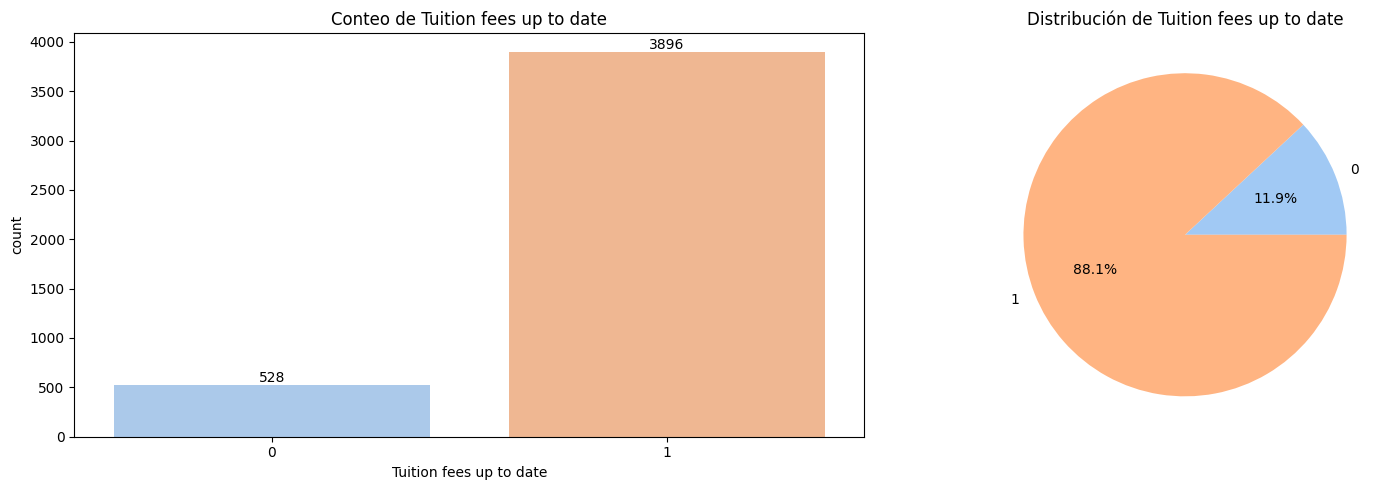

Column: Gender


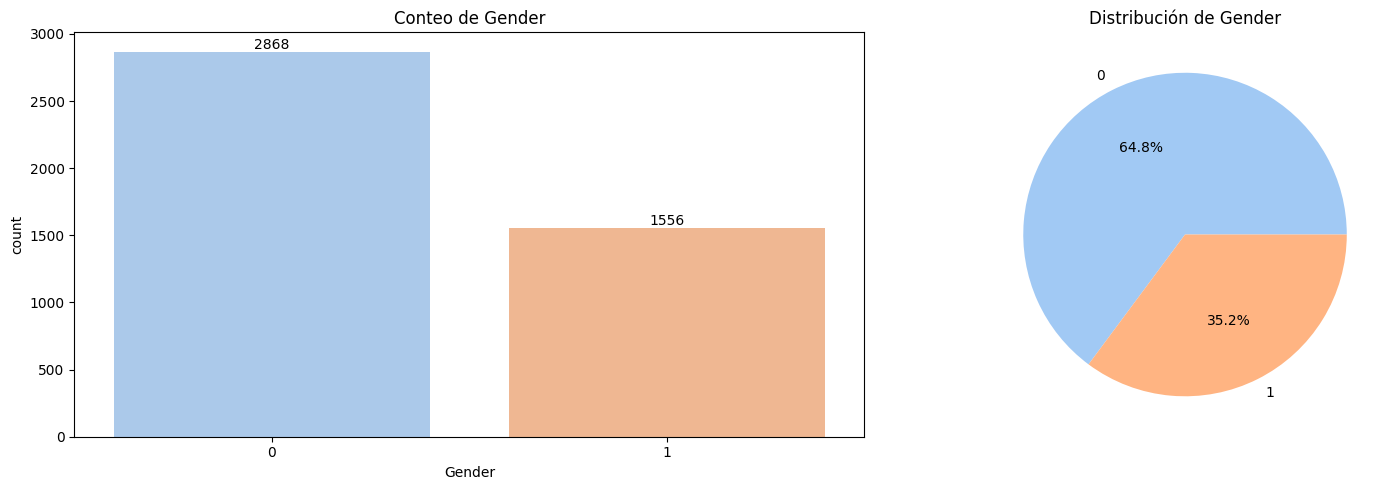

Column: Scholarship holder


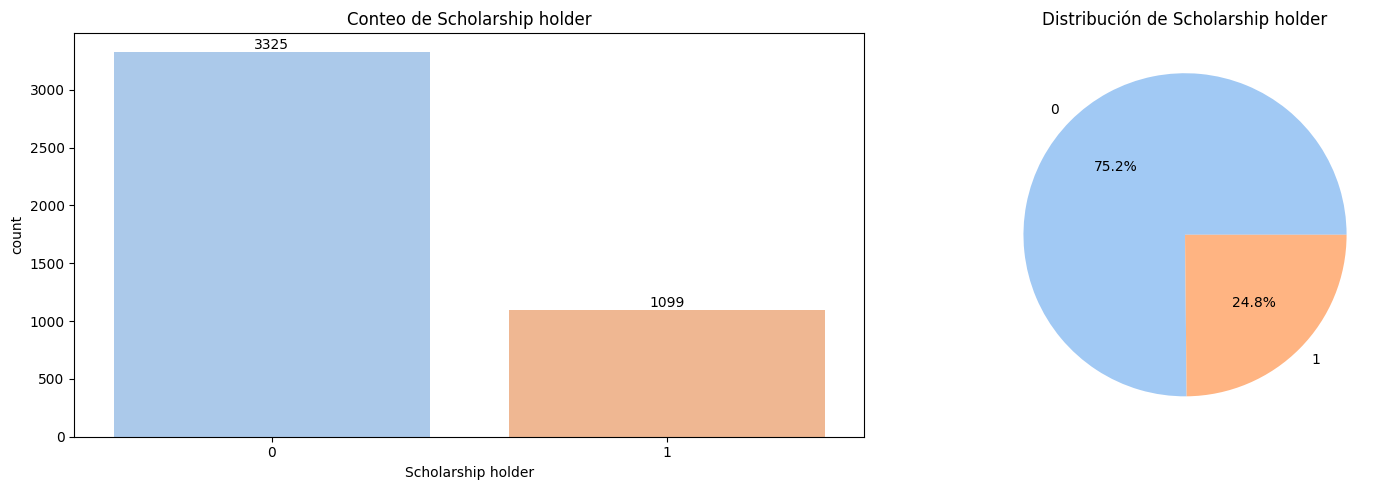

Column: International


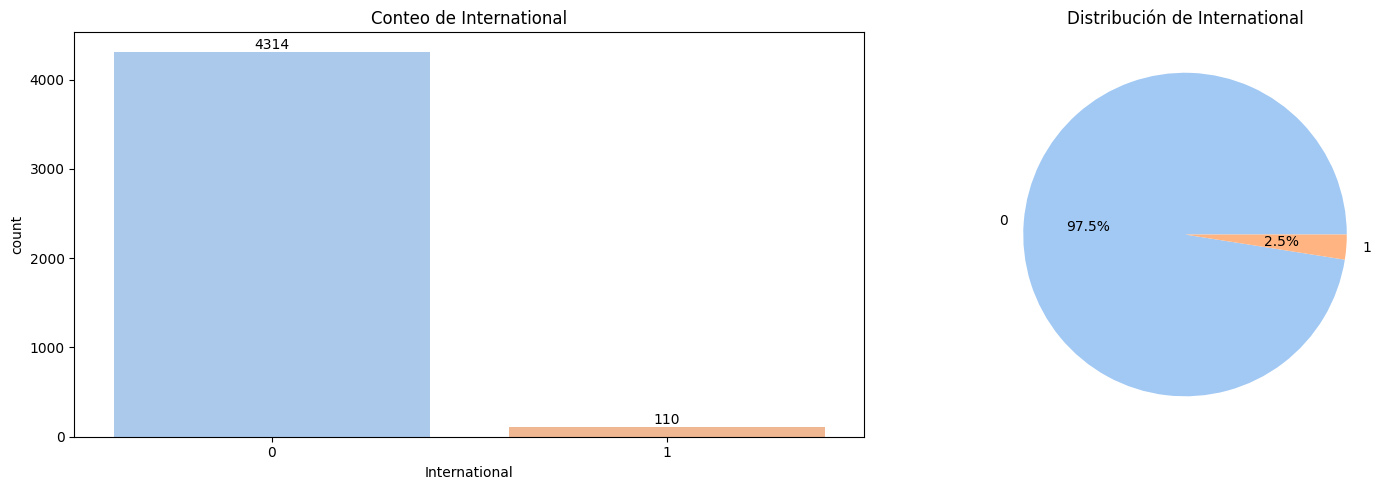

In [9]:
# Filtrar variables binarias 
binarias = [col for col in df.columns if df[col].nunique() == 2]

for col in binarias:
    print('Column:', col)
    plt.figure(figsize=(16, 5))
    
    # Definir el orden y los colores consistentes
    value_order = sorted(df[col].unique())
    colors = sns.color_palette('pastel')  # Misma paleta para ambos gráficos
    
    # Primer subplot - Gráfico de barras
    plt.subplot(1, 2, 1)
    ax = sns.countplot(x=df[col], palette=colors, order=value_order)
    plt.title(f'Conteo de {col}')
    
    # Añadir los valores encima de las barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')
    
    # Segundo subplot - Diagrama de torta
    plt.subplot(1, 2, 2)
    counts = df[col].value_counts().loc[value_order]  # Ordenar los conteos
    plt.pie(counts, 
            labels=counts.index, 
            autopct='%1.1f%%',
            colors=colors)  # Usar la misma paleta ordenada
    plt.title(f'Distribución de {col}')
    
    plt.tight_layout()
    plt.show()

**Interpretación de las Variables Binarias**

Las visualizaciones binarias del conjunto de datos, que incluyen gráficos de barras y circulares, revelan información clave sobre la composición de los estudiantes. 

- En primer lugar, la distribución de `Displaced` es casi equitativa, con un ligero predominio de estudiantes que no están desplazados (54.8%), sugiriendo que la mayoría de los estudiantes no han sido reubicados para sus estudios. 

- Por otro lado, la variable `Daytime/evening attendance` muestra un sesgo significativo hacia la asistencia diurna (89.1%), lo cual indica que la gran mayoría de los estudiantes está inscrita en programas de día. 

- En cuanto a las variables financieras, la mayoría de los estudiantes no son deudores (88.6%) y una proporción similar (88.1%) tiene sus matrículas al día, lo que sugiere una población estudiantil mayoritariamente solvente. 

- Con respecto al género, la distribución es desequilibrada, con un 64.8% de estudiantes identificados con el género 0 (Mujer) y un 35.2% con el género 1 (Hombre). 

- Además, la mayoría de los estudiantes no son beneficiarios de becas (75.2%), lo que podría ser un factor de interés para futuros análisis.

- Finalmente, las variables `Educational special needs` e `International` muestran distribuciones muy sesgadas, con solo un 1.2% y un 2.5% de estudiantes, respectivamente, en estas categorías. Esto indica que la población estudiantil es predominantemente local y no tiene necesidades educativas especiales, lo que debe ser considerado al analizar el impacto de estas variables.

### Variables Categóricas

A continuación, se presenta el análisis completo de frecuencias para cada variable categórica, mostrando:
- Conteo absoluto de observaciones por categoría
- Porcentaje relativo respecto al total
- Ordenamiento descendente por frecuencia

In [10]:
categoricas = ["Marital Status", "Application mode", "Course", "Previous qualification", "Nacionality", "Mother's qualification",
               "Father's qualification", "Mother's occupation", "Father's occupation"]

from IPython.display import display, HTML

def display_horizontal_table(df, variable, max_categories=50):
    counts = df[variable].value_counts()
    percentages = (counts / counts.sum() * 100).round(2)
    
    # Limitar el número de categorías mostradas
    counts = counts.head(max_categories)
    percentages = percentages.head(max_categories)
    
    # Crear el HTML
    html = f"""
    <h3>{variable} (Total categorías: {len(counts)})</h3>
    <div style="width:100%; overflow-x:auto;">
        <table border="1" style="border-collapse: collapse; width: auto;">
            <tr>
                <th>Metrica</th>
                {"".join(f'<th>{cat}</th>' for cat in counts.index)}
            </tr>
            <tr>
                <td><b>Conteo</b></td>
                {"".join(f'<td>{count}</td>' for count in counts.values)}
            </tr>
            <tr>
                <td><b>Porcentaje</b></td>
                {"".join(f'<td>{perc}%</td>' for perc in percentages.values)}
            </tr>
        </table>
    </div>
    """
    display(HTML(html))

# Mostrar todas las variables categóricas
for variable in categoricas:
    display_horizontal_table(df, variable)

---

Se generan gráficos de barras con las 10 categorías más dominantes dentro de cada variable categórica. Cada gráfico muestra:

- El número absoluto de observaciones (conteo).
- El porcentaje relativo respecto al total.

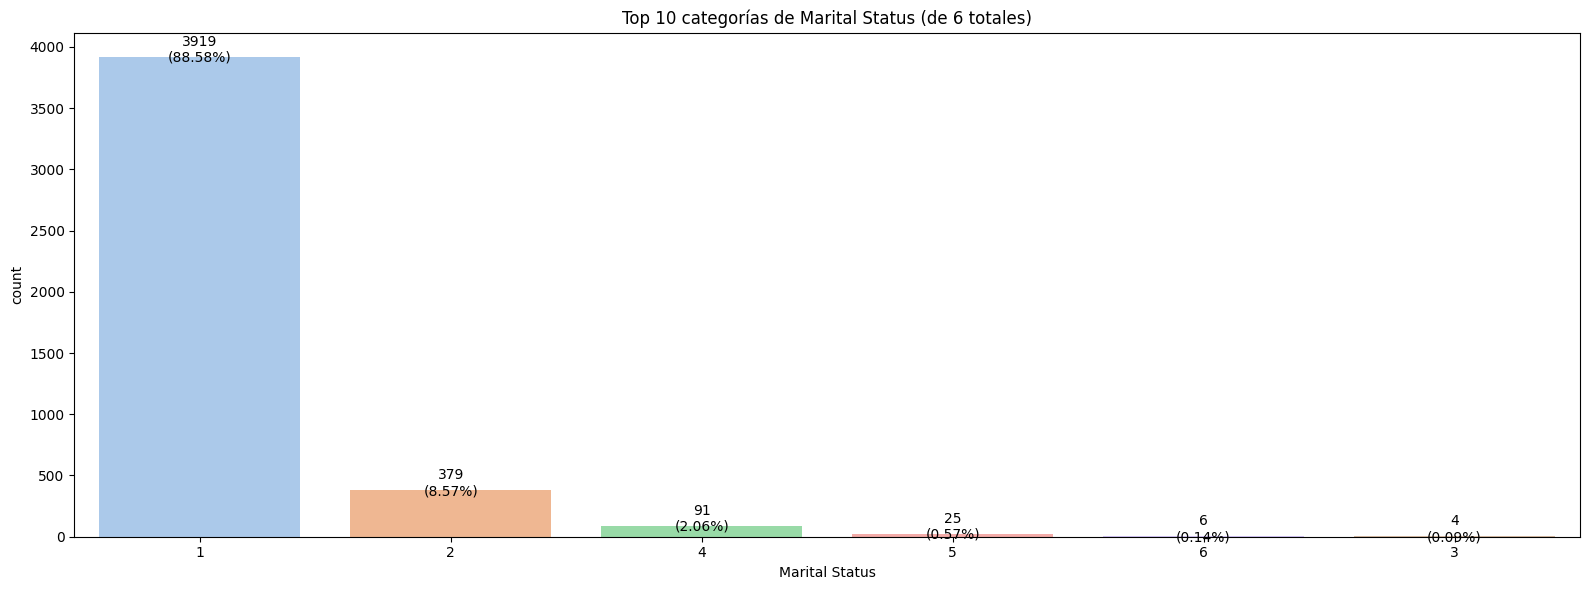

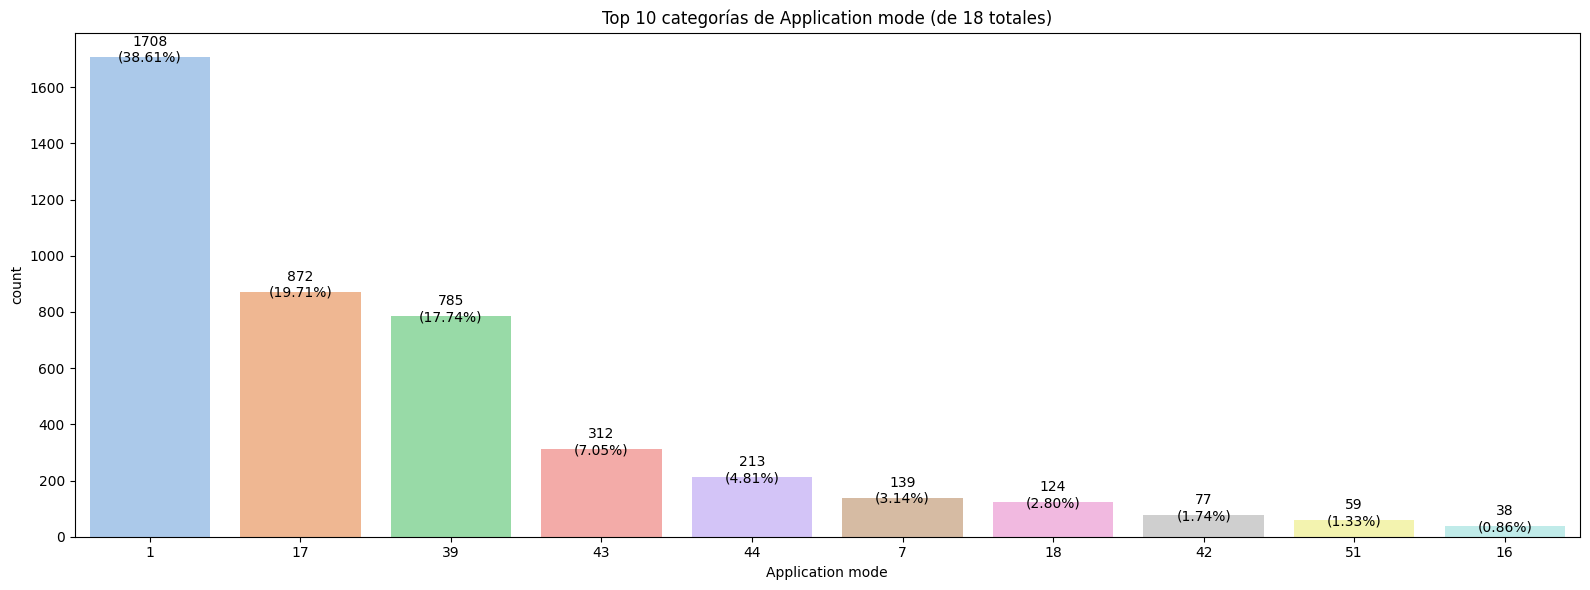

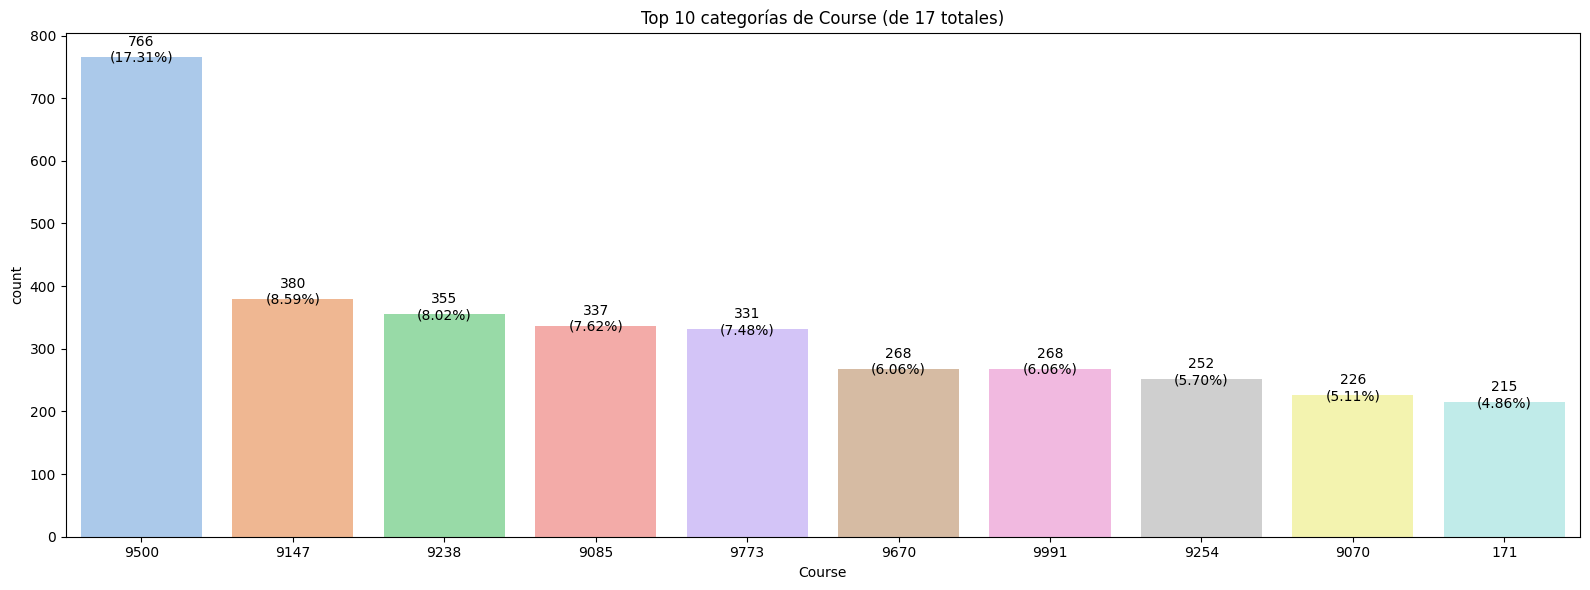

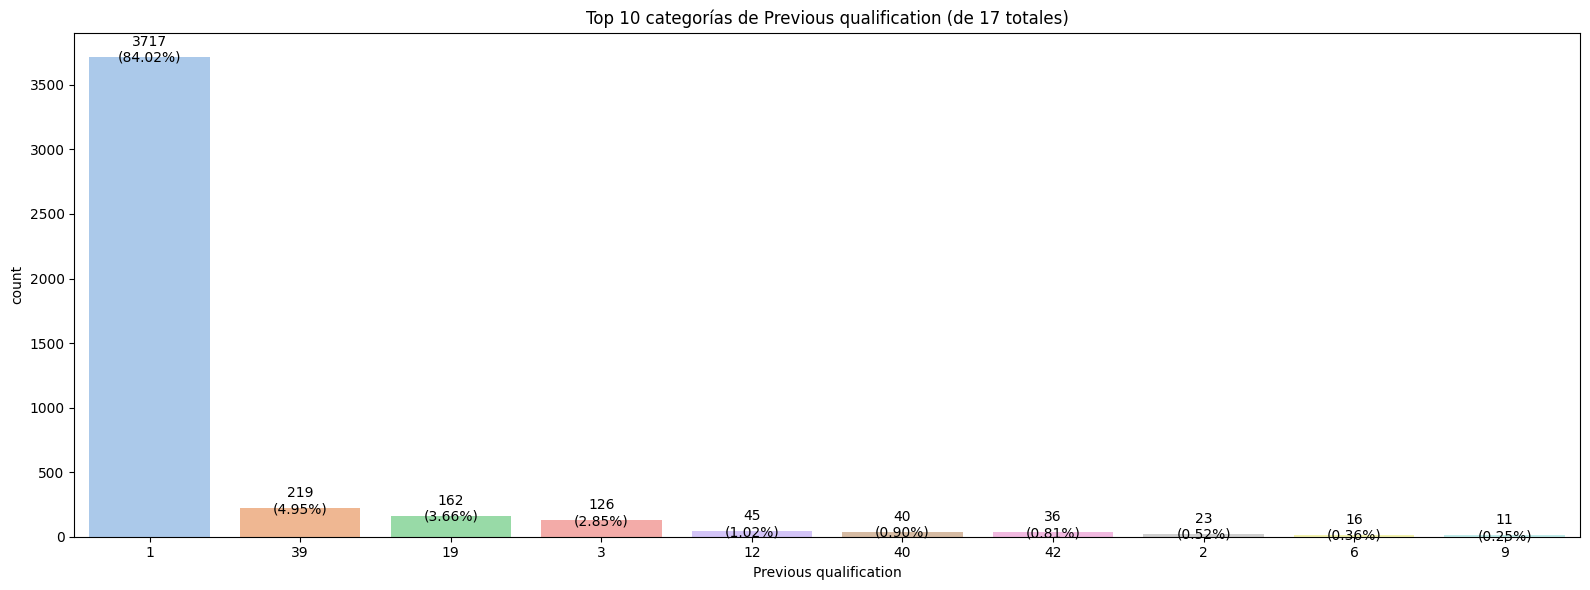

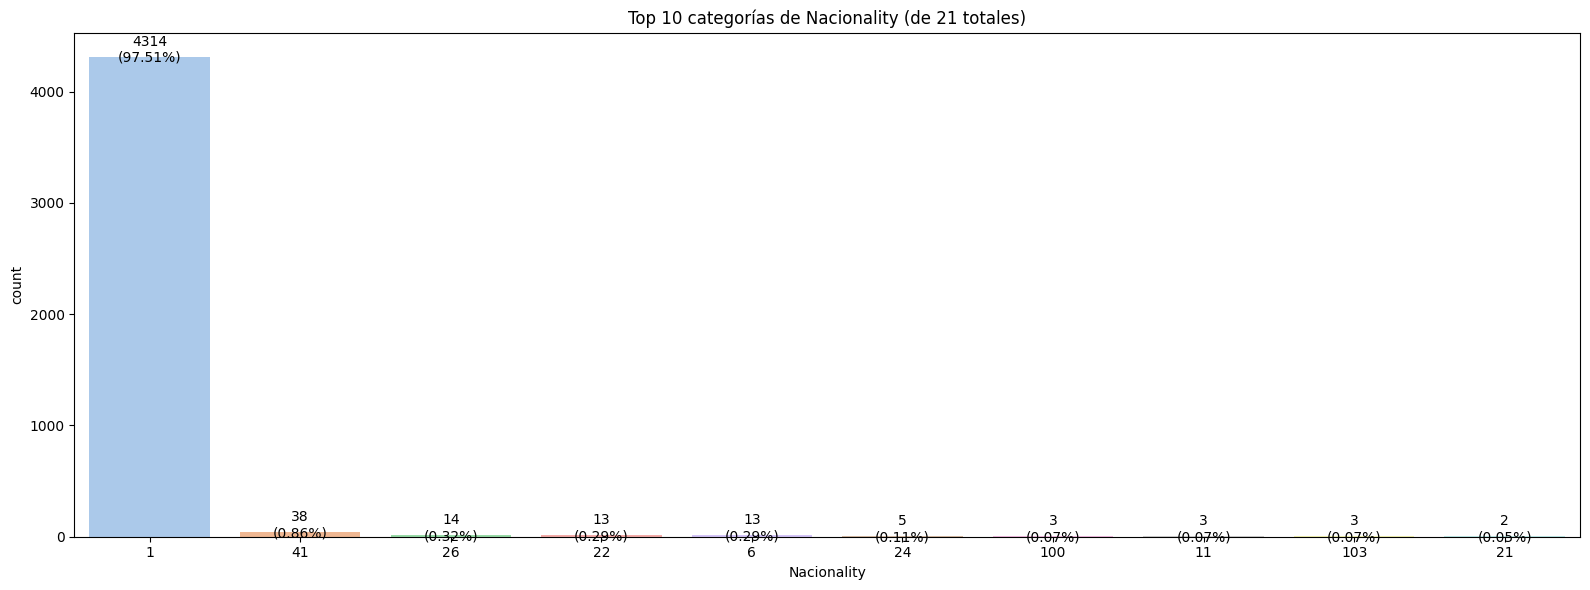

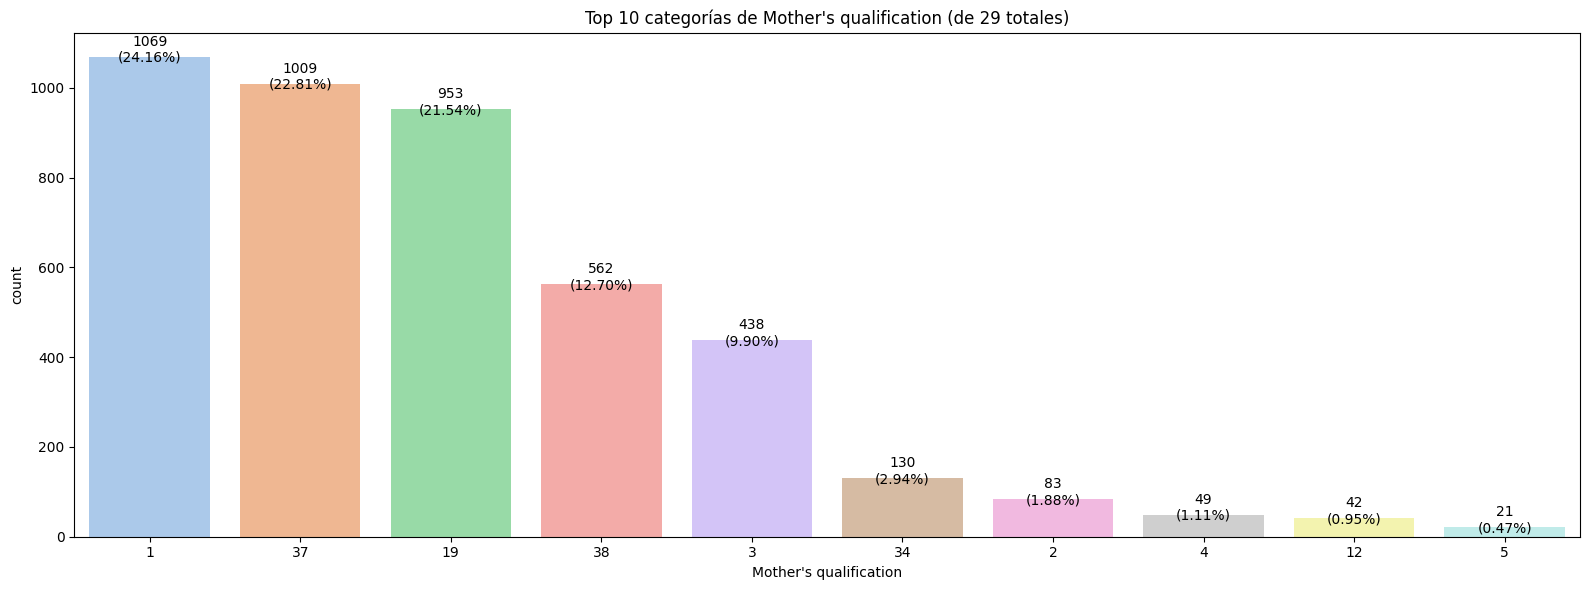

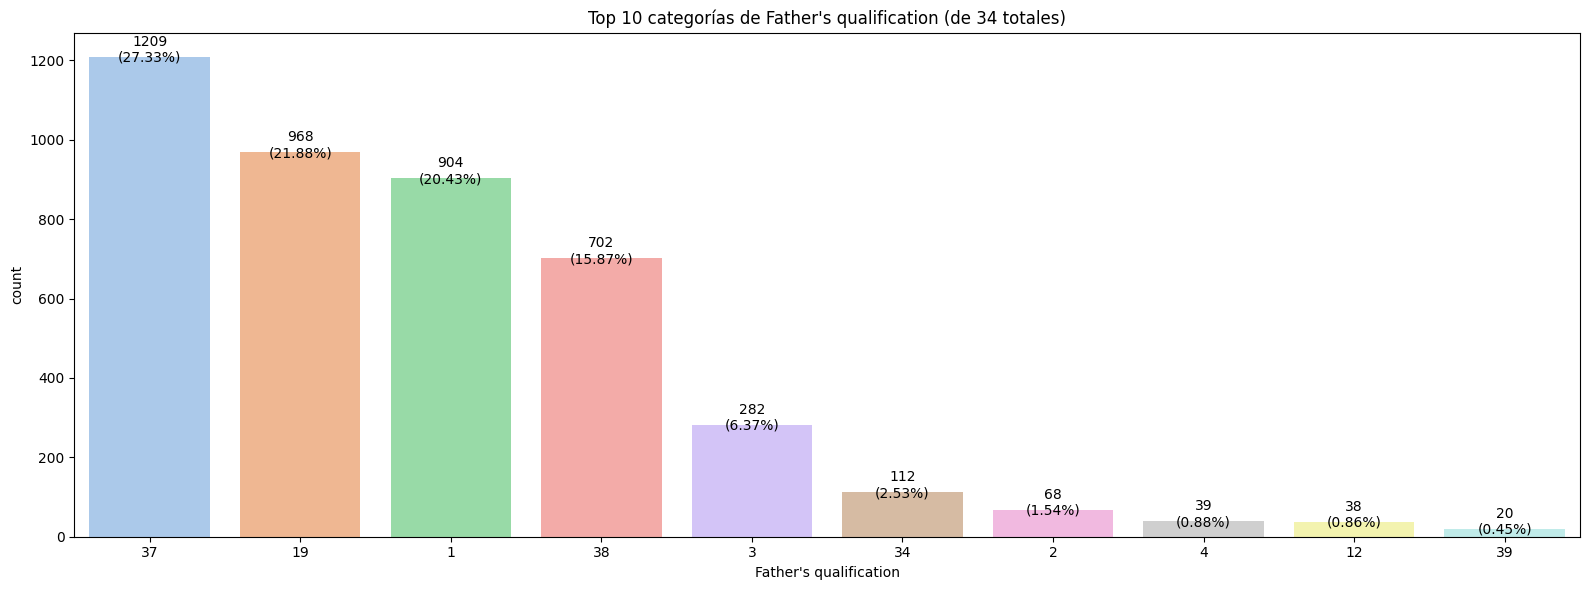

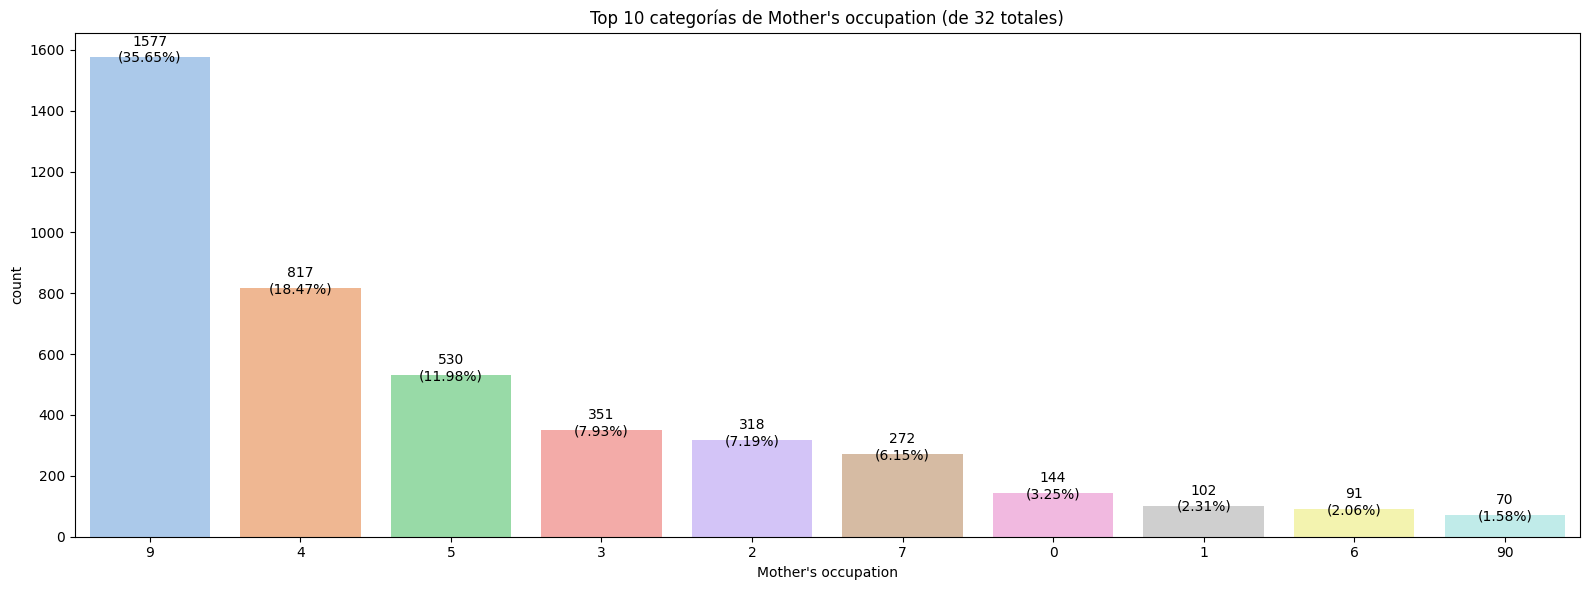

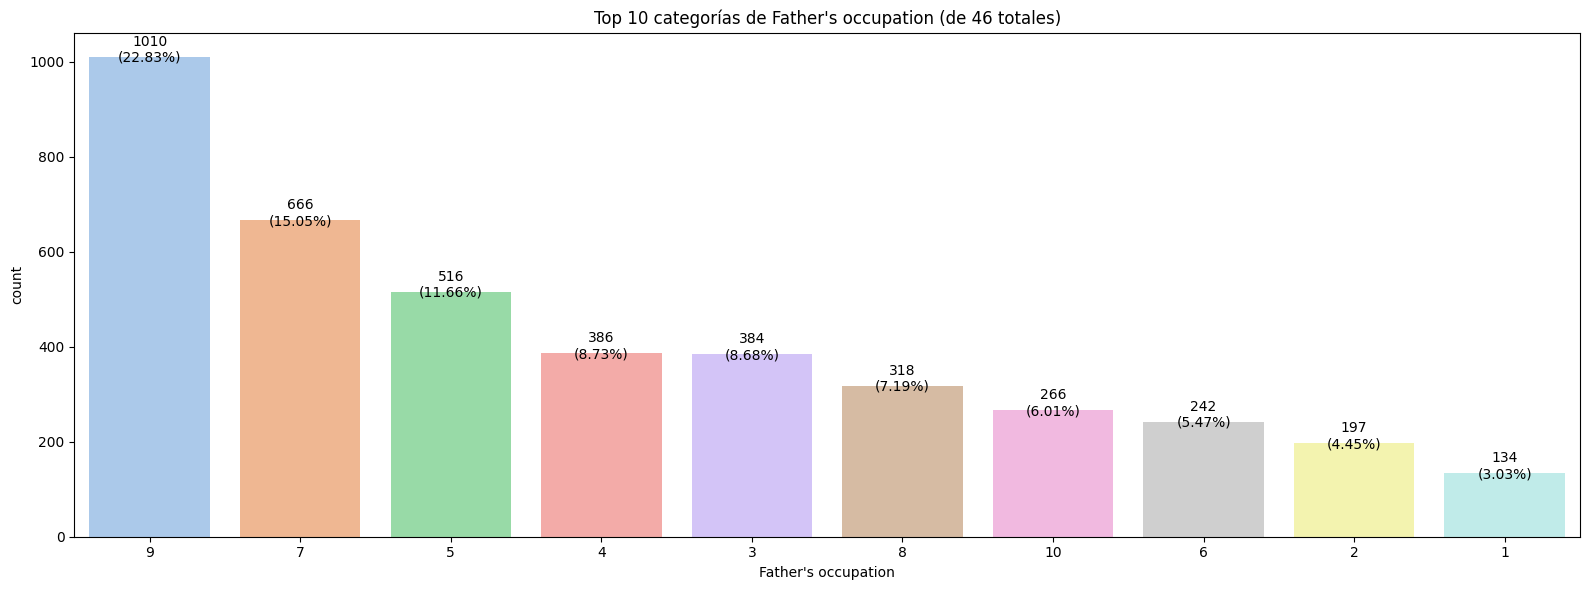

Column: Target


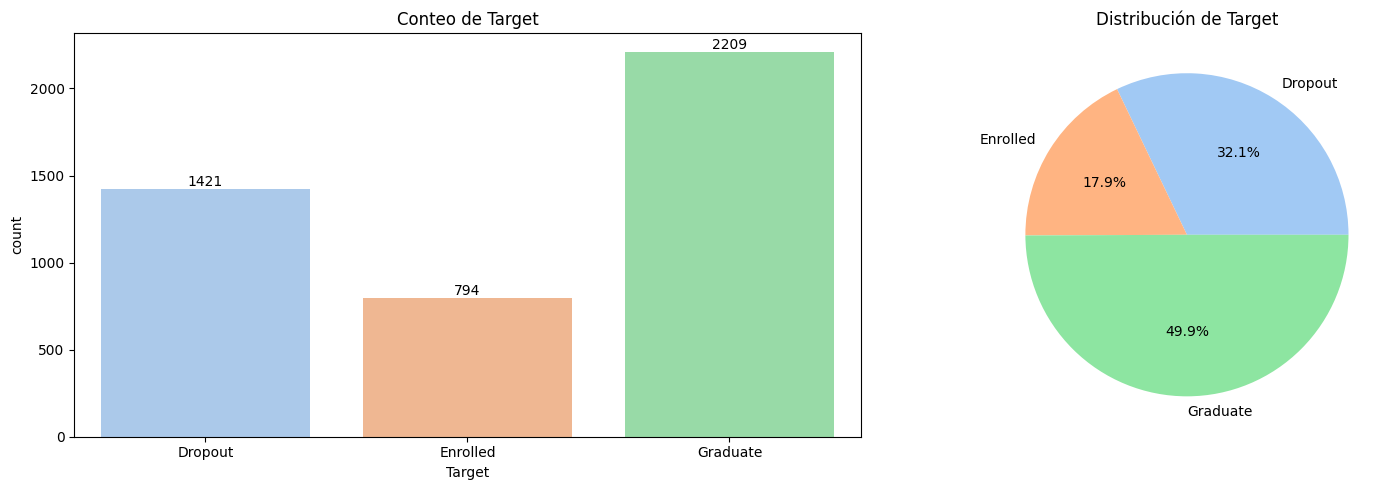

In [11]:
for col in categoricas:

    # Obtener las 10 categorías con más conteos
    top_categories = df[col].value_counts().nlargest(10)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(16, 6))
    ax = sns.countplot(
        x=df[col], 
        order=top_categories.index,
        palette='pastel'
    )
    
    # Añadir anotaciones
    for p in ax.patches:
        count = int(p.get_height())
        percent = 100 * p.get_height() / len(df[col])
        ax.annotate(
            f'{count}\n({percent:.2f}%)',
            (p.get_x() + p.get_width()/2., p.get_height()),
            ha='center', 
            va='center',
            xytext=(0, 5),
            textcoords='offset points',
            fontsize=10
        )
    
    plt.title(f'Top 10 categorías de {col} (de {df[col].nunique()} totales)')
    plt.tight_layout()
    plt.show()

print("Column: Target")
plt.figure(figsize=(16, 5))
    
# Definir el orden y los colores consistentes
value_order = sorted(df["Target"].unique())
colors = sns.color_palette('pastel')  # Misma paleta para ambos gráficos
    
# Primer subplot - Gráfico de barras
plt.subplot(1, 2, 1)
ax = sns.countplot(x=df["Target"], palette=colors, order=value_order)
plt.title("Conteo de Target")
    
# Añadir los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
    
# Segundo subplot - Diagrama de torta
plt.subplot(1, 2, 2)
counts = df["Target"].value_counts().loc[value_order]  # Ordenar los conteos
plt.pie(counts, 
        labels=counts.index, 
        autopct='%1.1f%%',
        colors=colors)  # Usar la misma paleta ordenada
plt.title("Distribución de Target")
    
plt.tight_layout()
plt.show()

**Interpretación de las variables Categóricas**

La variable de resultado principal, `Target`, muestra que casi la mitad de los estudiantes (49.9%) se han graduado, mientras que una porción significativa ha abandonado (32.1%) y el 17.9% restante sigue matriculado. Esta distribución equilibrada convierte al conjunto de datos en una base ideal para un modelo predictivo que busque identificar a los estudiantes en riesgo de deserción. 

- En cuanto a los factores demográficos y educativos, la población estudiantil está fuertemente concentrada en una única nacionalidad (97.51% en la categoría 1 = Portuguese), lo que sugiere que los datos provienen de una región específica. 

- De manera similar, existe una prevalencia marcada de estudiantes con un solo estado civil (88.58% en la categoría 1 = Single) y una titulación previa dominante (84.02% en la categoría 1 = Secondary education). 

- Los cursos más comunes (como 9500 = Nursing y 9147 = Management) y los modos de solicitud (por ejemplo, 1 = 1st phase - general contingent, 17 = 2nd phase - general contingent y 39 = Over 23 years old) son muy específicos, lo que indica rutas de ingreso bien definidas. 

- Por último, los antecedentes educativos y ocupacionales de los padres también muestran una concentración en categorías específicas, con la titulación de la madre (1 = Secondary Education y 37 = Basic education 1st cycle (4th/5th year) or equiv.) siendo las más comunes, y las ocupaciones del padre (9 = Unskilled Workers y 7 = Skilled Workers in Industry, Construction and Craftsmen) destacando, lo que sugiere posibles patrones socioeconómicos dentro de la población estudiantil.

### Variables Númericas

A continuación, Se genera una tabla para visualizar algunos estadísticos descriptivos para las variables númericas.

In [12]:
numericas = ["Application order", "Previous qualification (grade)", "Admission grade", "Age at enrollment",
             "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (evaluations)",
             "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)",
             "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)",
             "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)",
             "Unemployment rate", "Inflation rate", "GDP"]

df[numericas].describe().T

count        mean        std  \
Application order                               4424.0    1.727848   1.313793   
Previous qualification (grade)                  4424.0  132.613314  13.188332   
Admission grade                                 4424.0  126.978119  14.482001   
Age at enrollment                               4424.0   23.265145   7.587816   
Curricular units 1st sem (credited)             4424.0    0.709991   2.360507   
Curricular units 1st sem (enrolled)             4424.0    6.270570   2.480178   
Curricular units 1st sem (evaluations)          4424.0    8.299051   4.179106   
Curricular units 1st sem (approved)             4424.0    4.706600   3.094238   
Curricular units 1st sem (grade)                4424.0   10.640822   4.843663   
Curricular units 1st sem (without evaluations)  4424.0    0.137658   0.690880   
Curricular units 2nd sem (credited)             4424.0    0.541817   1.918546   
Curricular units 2nd sem (enrolled)             4424.0    6.232143   2.195951   
Curricular units 2nd sem (evaluations)          4424.0    8.063291   3.947951   
Curricular units 2nd sem (approved)             4424.0    4.435805   3.014764   
Curricular units 2nd sem (grade)                4424.0   10.230206   5.210808   
Curricular units 2nd sem (without evaluations)  4424.0    0.150316   0.753774   
Unemployment rate                               4424.0   11.566139   2.663850   
Inflation rate                                  4424.0    1.228029   1.382711   
GDP                                             4424.0    0.001969   2.269935   

                                                  min     25%         50%  \
Application order                                0.00    1.00    1.000000   
Previous qualification (grade)                  95.00  125.00  133.100000   
Admission grade                                 95.00  117.90  126.100000   
Age at enrollment                               17.00   19.00   20.000000   
Curricular units 1st sem (credited)              0.00    0.00    0.000000   
Curricular units 1st sem (enrolled)              0.00    5.00    6.000000   
Curricular units 1st sem (evaluations)           0.00    6.00    8.000000   
Curricular units 1st sem (approved)              0.00    3.00    5.000000   
Curricular units 1st sem (grade)                 0.00   11.00   12.285714   
Curricular units 1st sem (without evaluations)   0.00    0.00    0.000000   
Curricular units 2nd sem (credited)              0.00    0.00    0.000000   
Curricular units 2nd sem (enrolled)              0.00    5.00    6.000000   
Curricular units 2nd sem (evaluations)           0.00    6.00    8.000000   
Curricular units 2nd sem (approved)              0.00    2.00    5.000000   
Curricular units 2nd sem (grade)                 0.00   10.75   12.200000   
Curricular units 2nd sem (without evaluations)   0.00    0.00    0.000000   
Unemployment rate                                7.60    9.40   11.100000   
Inflation rate                                  -0.80    0.30    1.400000   
GDP                                             -4.06   -1.70    0.320000   

                                                       75%         max  
Application order                                 2.000000    9.000000  
Previous qualification (grade)                  140.000000  190.000000  
Admission grade                                 134.800000  190.000000  
Age at enrollment                                25.000000   70.000000  
Curricular units 1st sem (credited)               0.000000   20.000000  
Curricular units 1st sem (enrolled)               7.000000   26.000000  
Curricular units 1st sem (evaluations)           10.000000   45.000000  
Curricular units 1st sem (approved)               6.000000   26.000000  
Curricular units 1st sem (grade)                 13.400000   18.875000  
Curricular units 1st sem (without evaluations)    0.000000   12.000000  
Curricular units 2nd sem (credited)               0.000000   19.000000  
Curricular 

**Interpretación de las Variables Númericas**

Basado en el resumen estadístico de las variables númericas, podemos observar varias tendencias clave. 

- La edad promedio de los estudiantes al matricularse es de aproximadamente 23.27 años, con una desviación estándar considerable, lo que indica una amplia dispersión de edades en la población estudiantil. 

- En cuanto a las calificaciones, tanto la calificación de admisión como la calificación de la titulación previa tienen medias elevadas (126.98 y 132.61 respectivamente), lo que sugiere que los estudiantes ingresan con un buen rendimiento académico previo. 

- Las métricas de desempeño del primer y segundo semestre muestran un comportamiento similar: la media de unidades curriculares aprobadas es de aproximadamente 4.71 en el primer semestre y 4.44 en el segundo, con un promedio de calificaciones de alrededor de 10.64 y 10.23, respectivamente. Esto indica que el rendimiento académico se mantiene relativamente constante entre ambos semestres, aunque con una ligera disminución. 

- Es notable que la media de unidades curriculares sin evaluaciones es muy baja en ambos semestres, lo que sugiere una alta tasa de participación en los exámenes. 

- Finalmente, los indicadores socioeconómicos muestran una tasa de desempleo promedio del 11.57%, una tasa de inflación del 1.23% y un GDP promedio de 0.002, lo que contextualiza el entorno económico en el que se encuentran los estudiantes.

---

Se generan histogramas y boxplots para visualizar la distribución de frecuencias e identificar outliers (puntos fuera de los bigotes) y la dispersión de los datos. Además se evalua:

- Asimetría:
    - `skew = 0`: Distribución simétrica (valores aceptables skew $\in (-1,1)$).
    - `skew > 0`: Mayor peso en la cola izquierda de la distribución (sesgo positivo).
    - `skew < 0`: Mayor peso en la cola derecha de la distribución (sesgo negativo).

- Kurtosis: Determina si una distribución tiene colas gruesas con respecto a la distribución normal. Proporciona información sobre la forma de una distribución de frecuencias.
    - `kurtosis = 3`: se denomina mesocúrtica (distribución normal).
    - `kurtosis < 3`: se denomina platicúrtica (distribución con colas menos gruesas que la normal).
    - `kurtosis > 3`: se denomina leptocúrtica (distribución con colas más gruesas que la normal) y significa que trata de producir más valores atípicos que la distribución normal.

- Coeficiente de Variación: es una medida estadística que se utiliza para evaluar la variabilidad relativa de una muestra o población en relación con su media. Se calcula como la desviación estándar de los datos dividida por la media, y se expresa como un porcentaje multiplicado por 100 para facilitar su interpretación.

Column: Application order
Skew: 1.88
Kurtosis:  2.65
Coeficiente de variación: 0.76


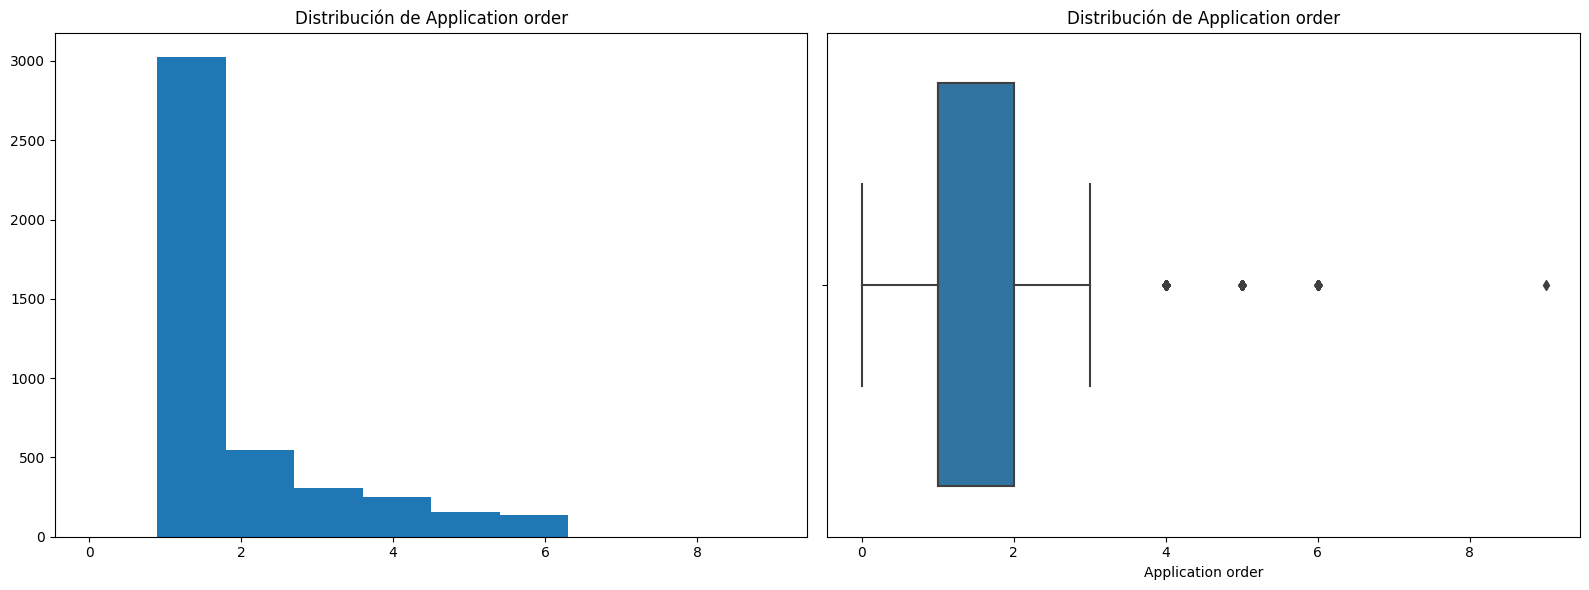

Column: Previous qualification (grade)
Skew: 0.31
Kurtosis:  0.97
Coeficiente de variación: 0.10


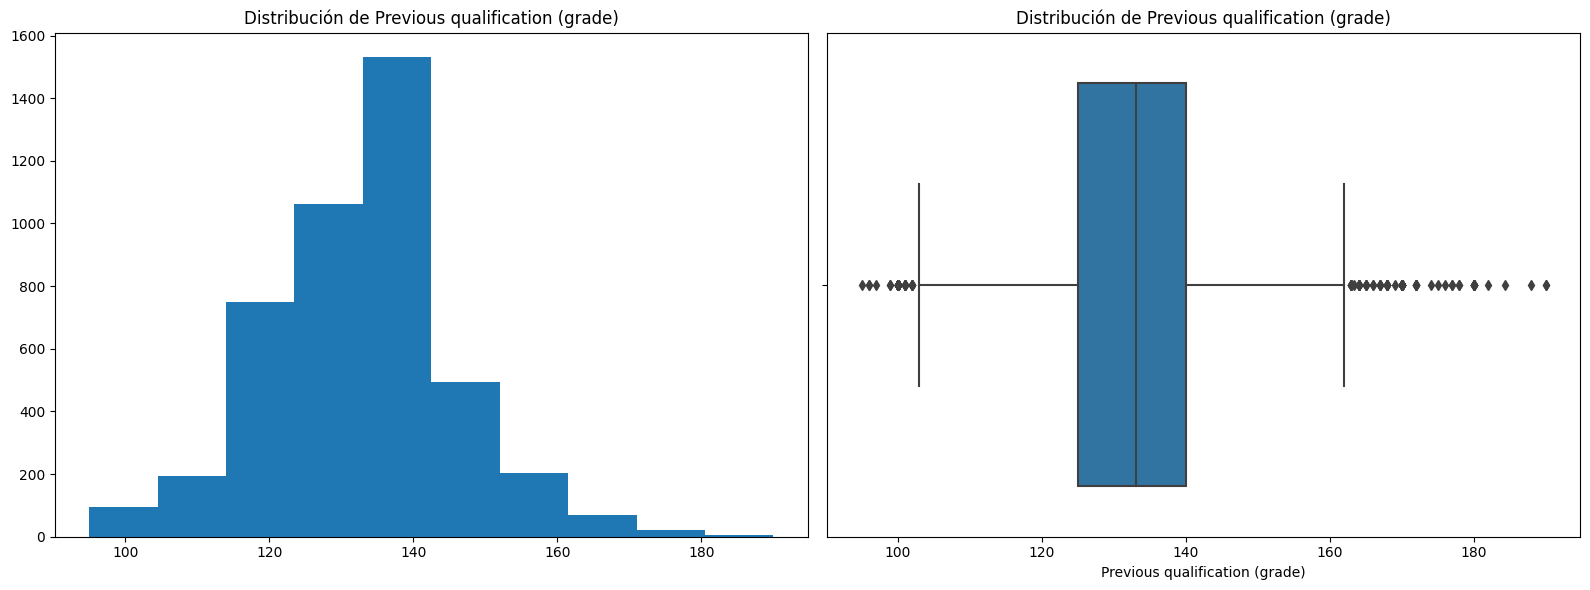

Column: Admission grade
Skew: 0.53
Kurtosis:  0.66
Coeficiente de variación: 0.11


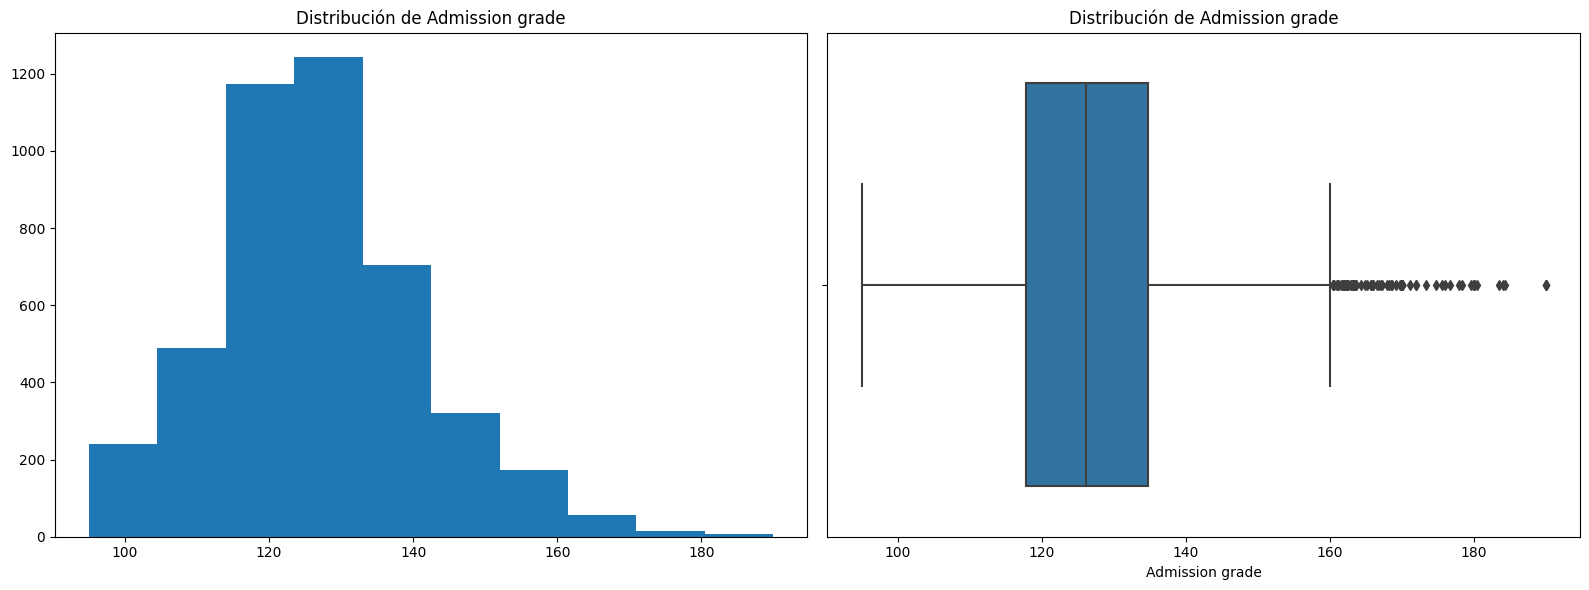

Column: Age at enrollment
Skew: 2.05
Kurtosis:  4.13
Coeficiente de variación: 0.33


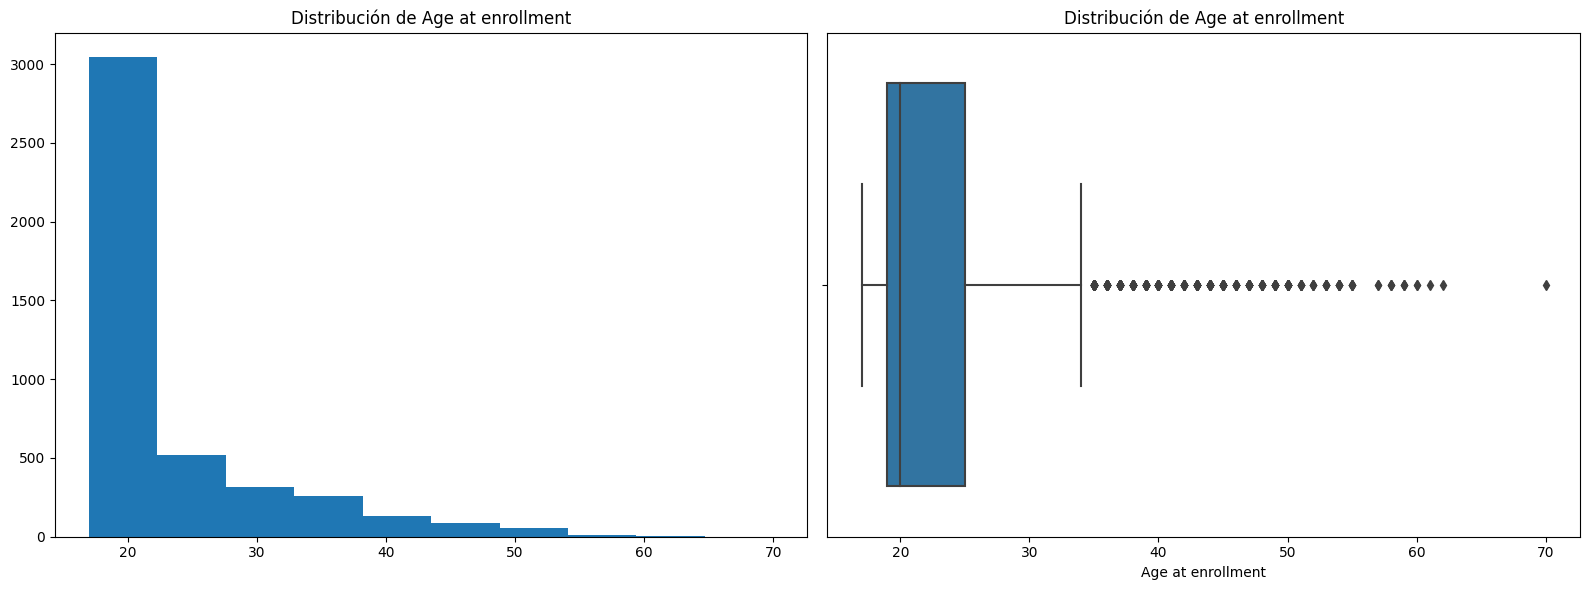

Column: Curricular units 1st sem (credited)
Skew: 4.17
Kurtosis:  19.21
Coeficiente de variación: 3.32


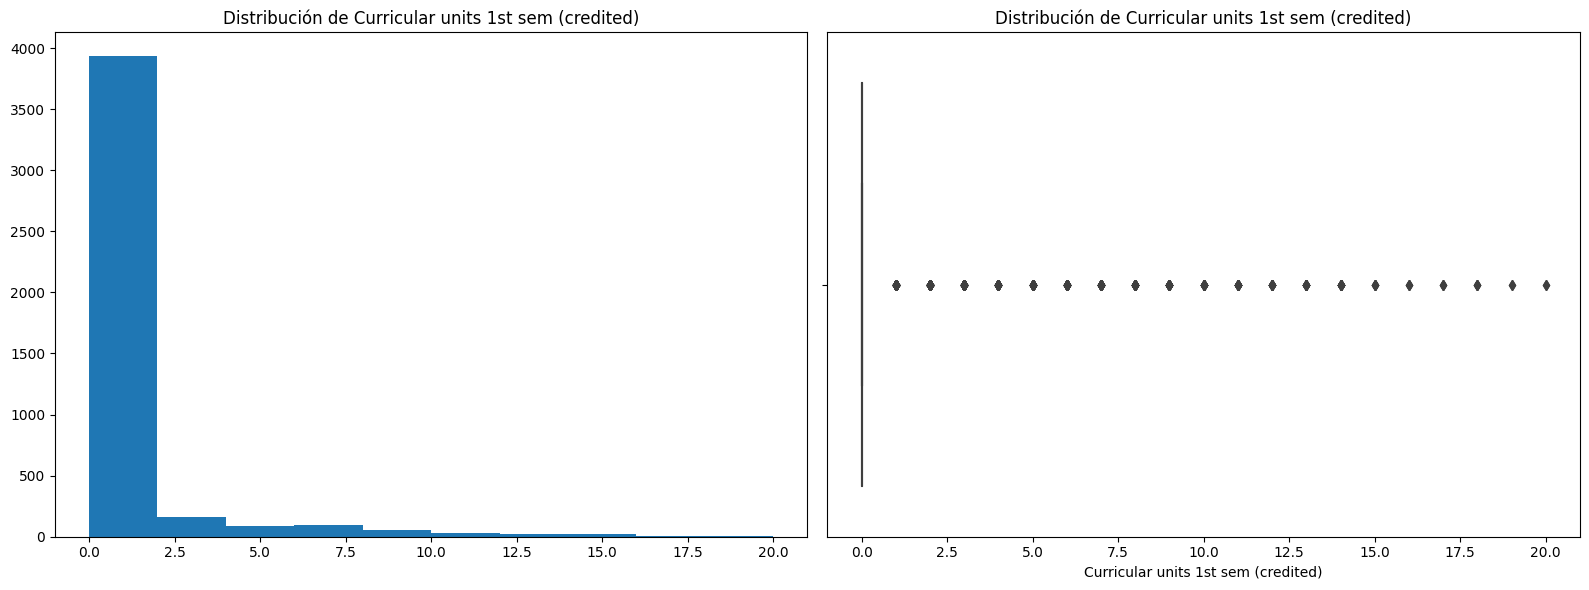

Column: Curricular units 1st sem (enrolled)
Skew: 1.62
Kurtosis:  8.94
Coeficiente de variación: 0.40


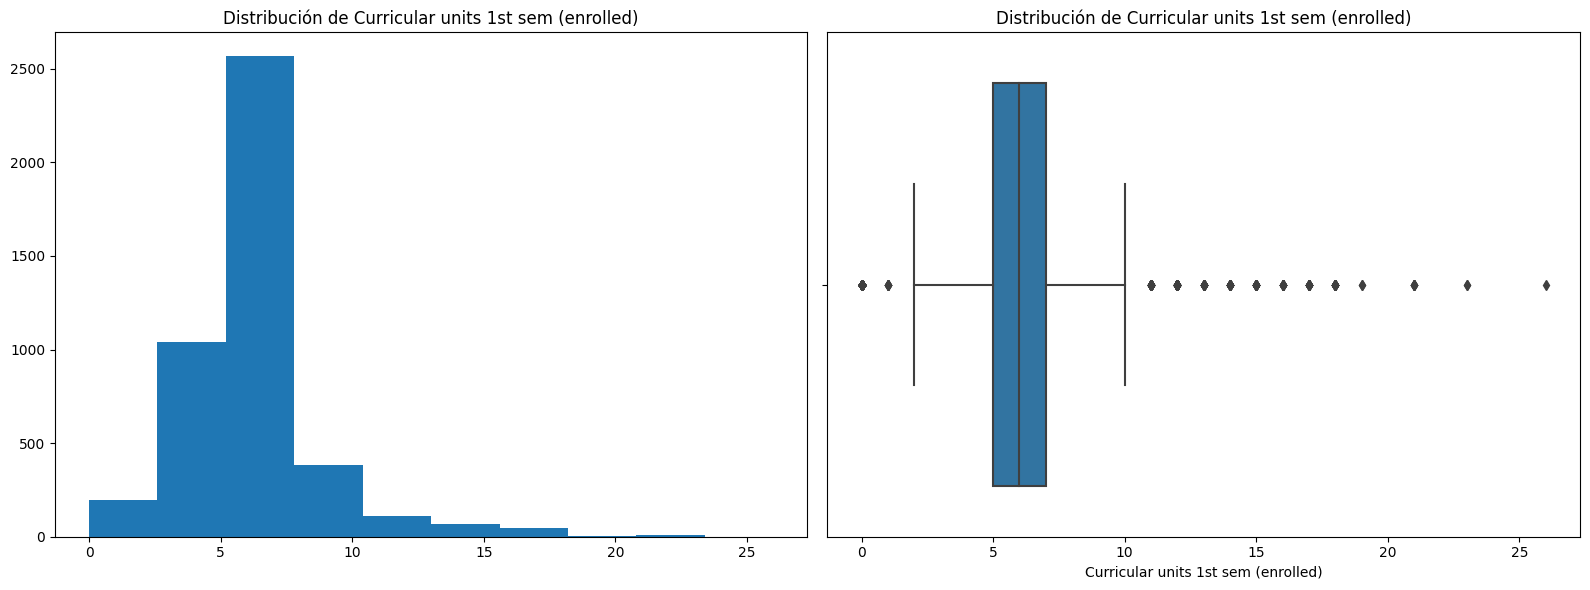

Column: Curricular units 1st sem (evaluations)
Skew: 0.98
Kurtosis:  5.46
Coeficiente de variación: 0.50


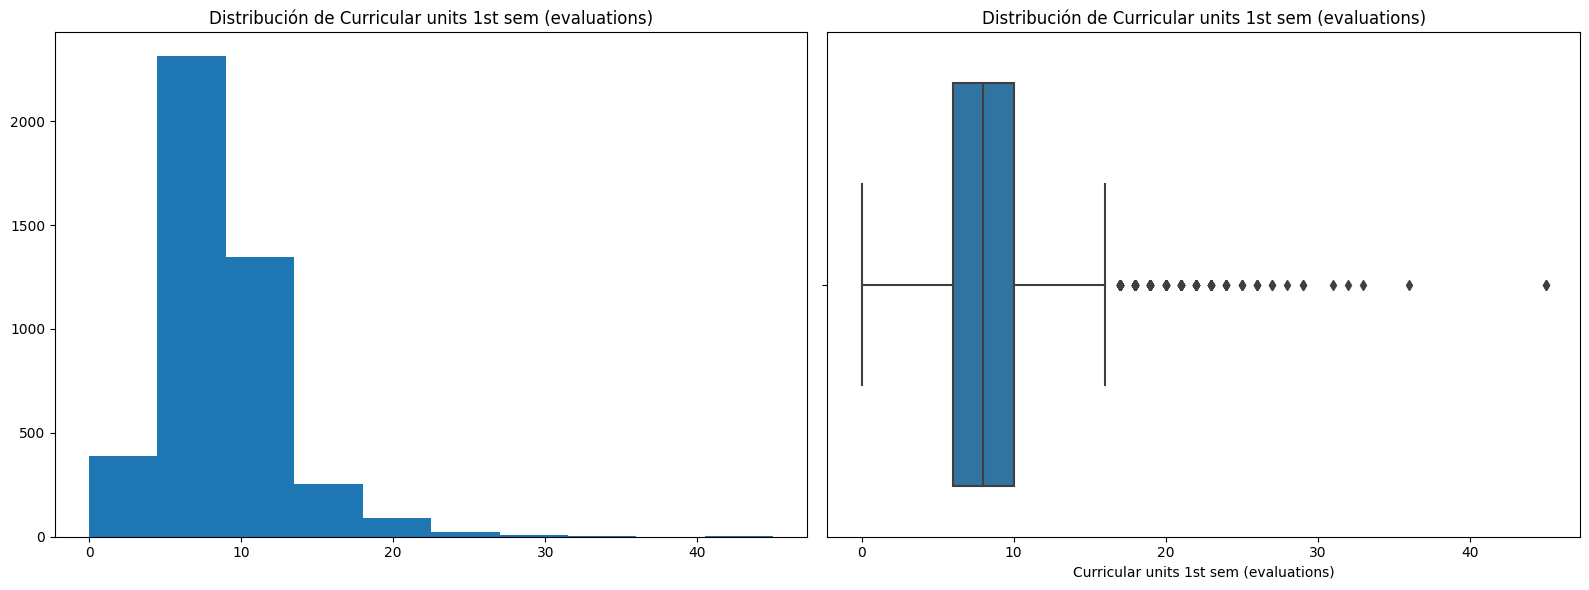

Column: Curricular units 1st sem (approved)
Skew: 0.77
Kurtosis:  3.1
Coeficiente de variación: 0.66


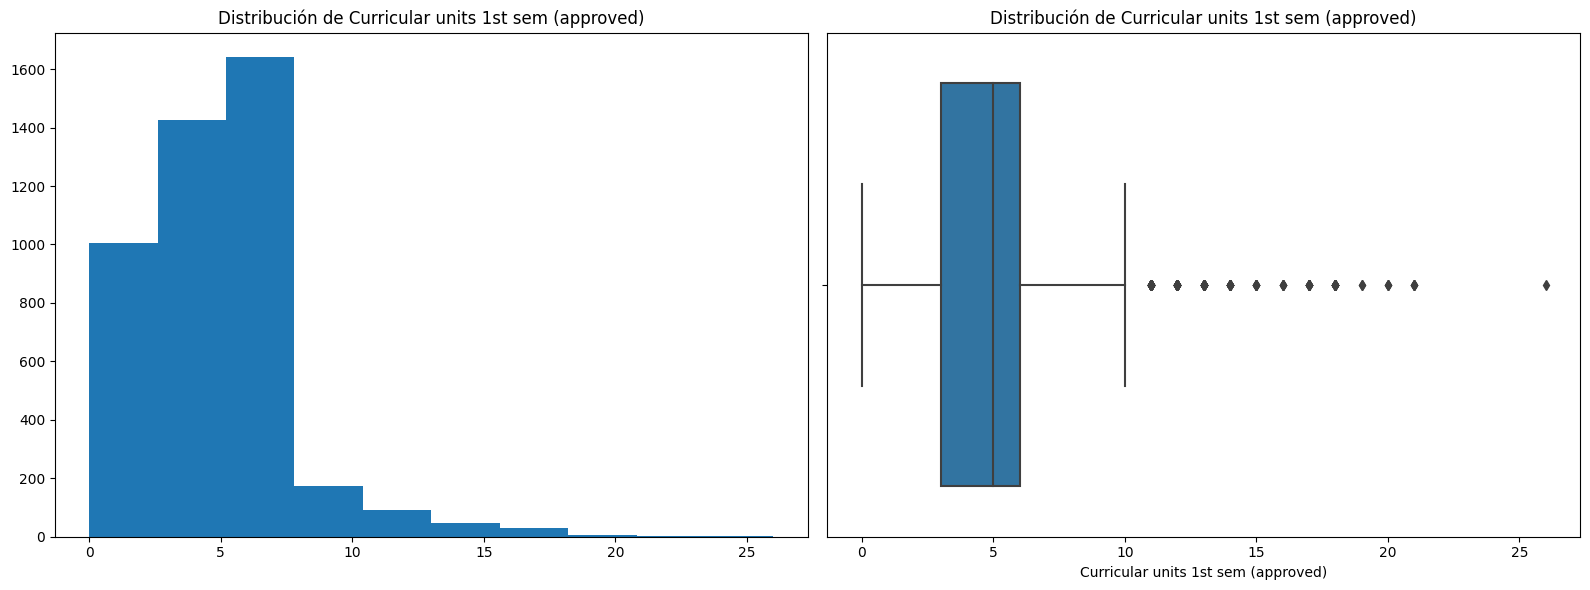

Column: Curricular units 1st sem (grade)
Skew: -1.57
Kurtosis:  0.91
Coeficiente de variación: 0.46


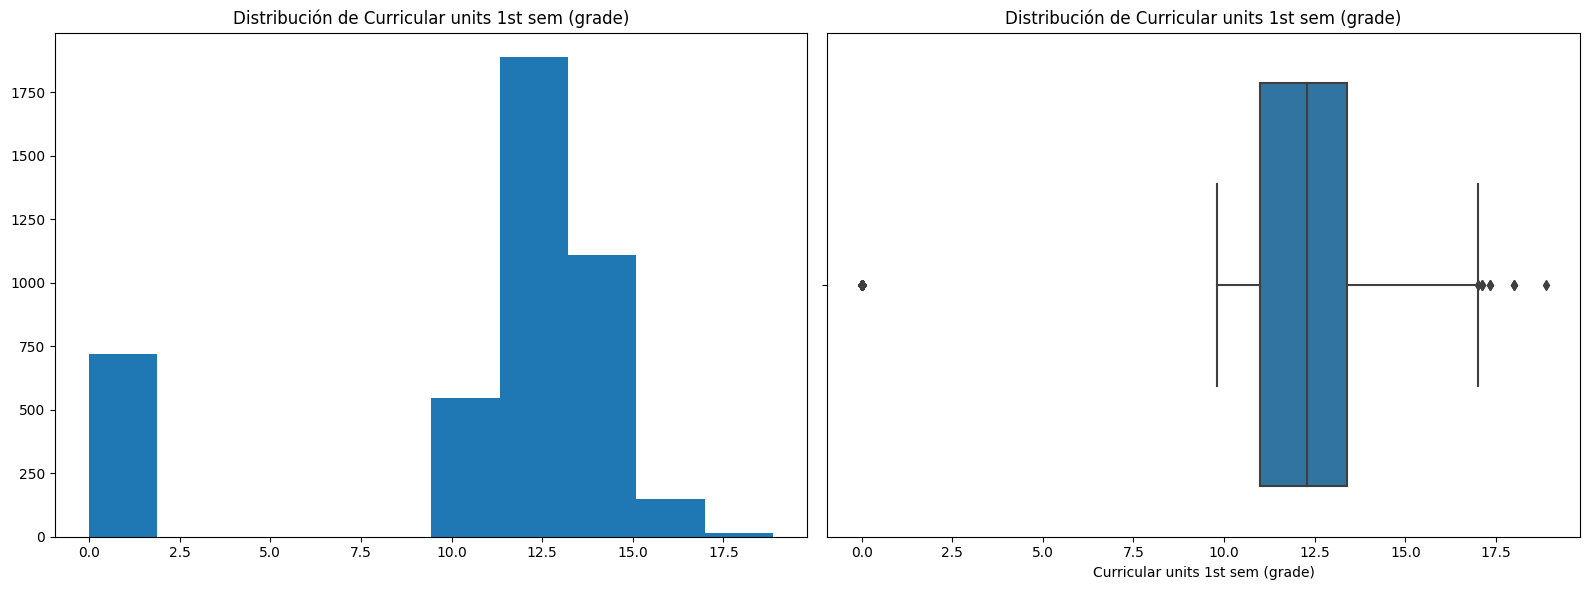

Column: Curricular units 1st sem (without evaluations)
Skew: 8.21
Kurtosis:  89.86
Coeficiente de variación: 5.02


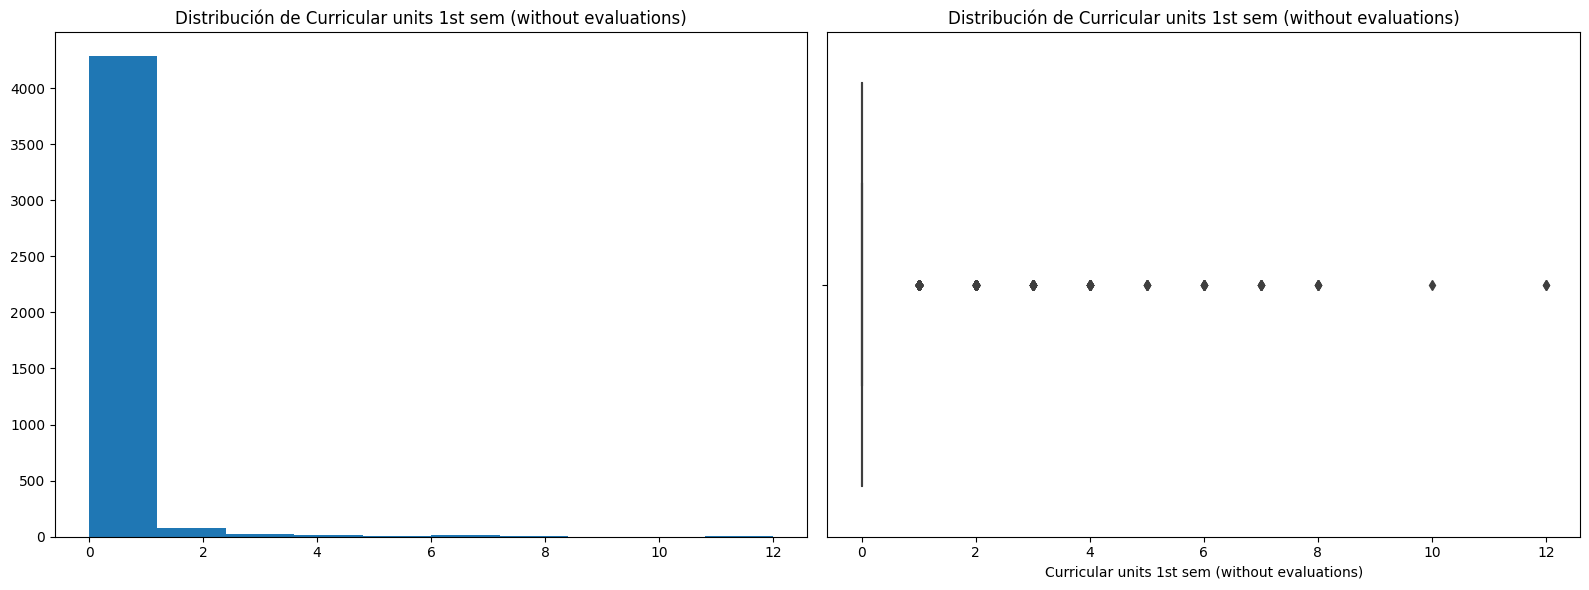

Column: Curricular units 2nd sem (credited)
Skew: 4.63
Kurtosis:  24.43
Coeficiente de variación: 3.54


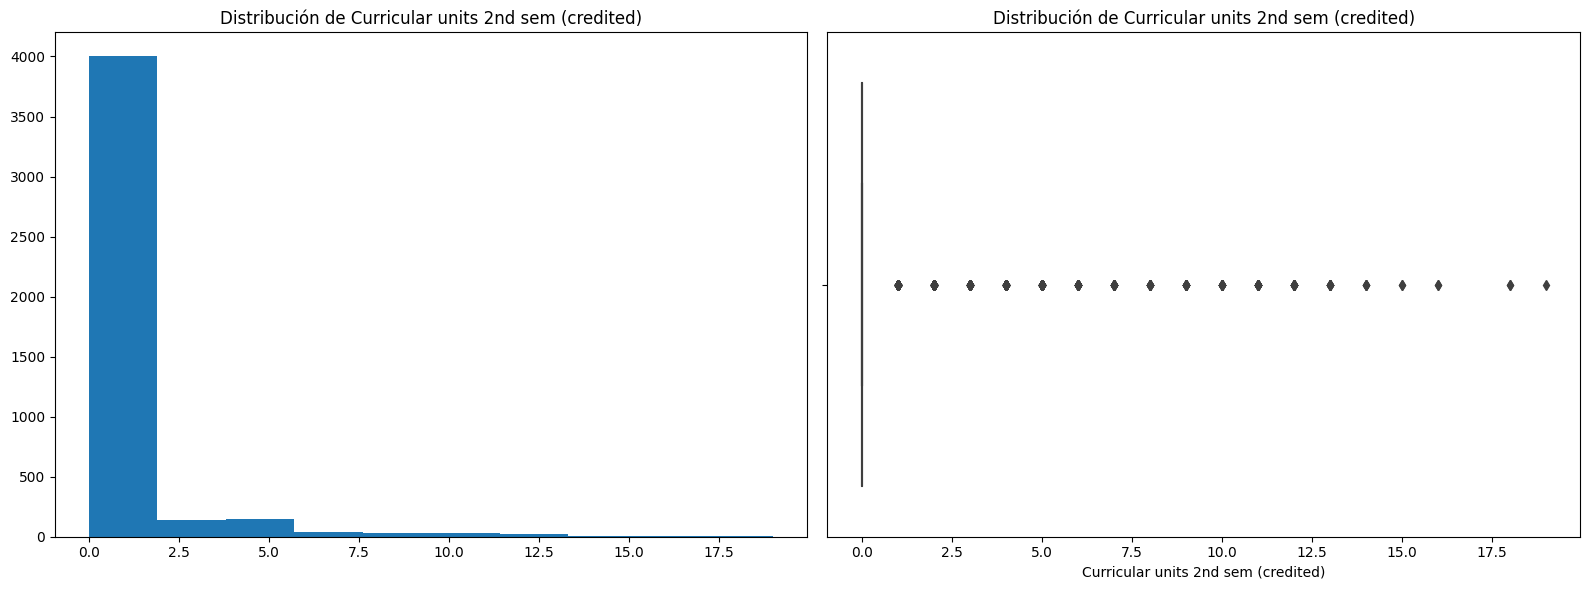

Column: Curricular units 2nd sem (enrolled)
Skew: 0.79
Kurtosis:  7.13
Coeficiente de variación: 0.35


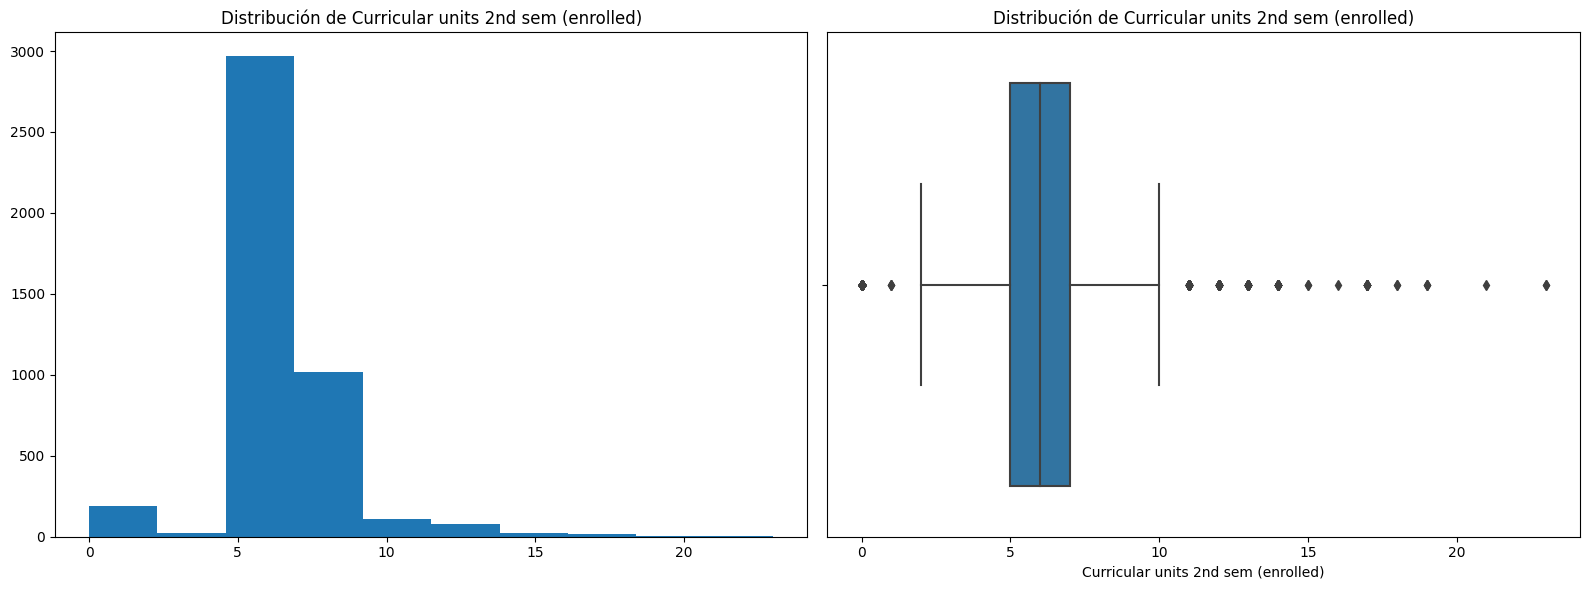

Column: Curricular units 2nd sem (evaluations)
Skew: 0.34
Kurtosis:  2.07
Coeficiente de variación: 0.49


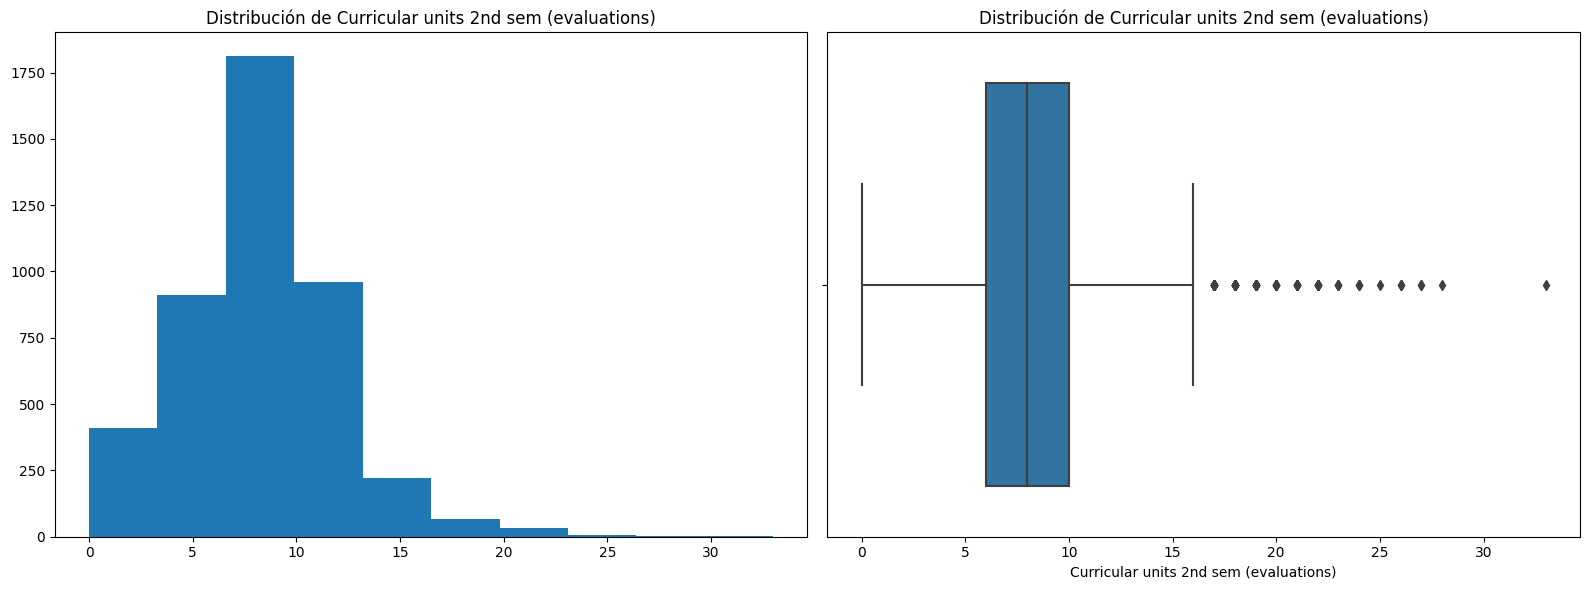

Column: Curricular units 2nd sem (approved)
Skew: 0.31
Kurtosis:  0.85
Coeficiente de variación: 0.68


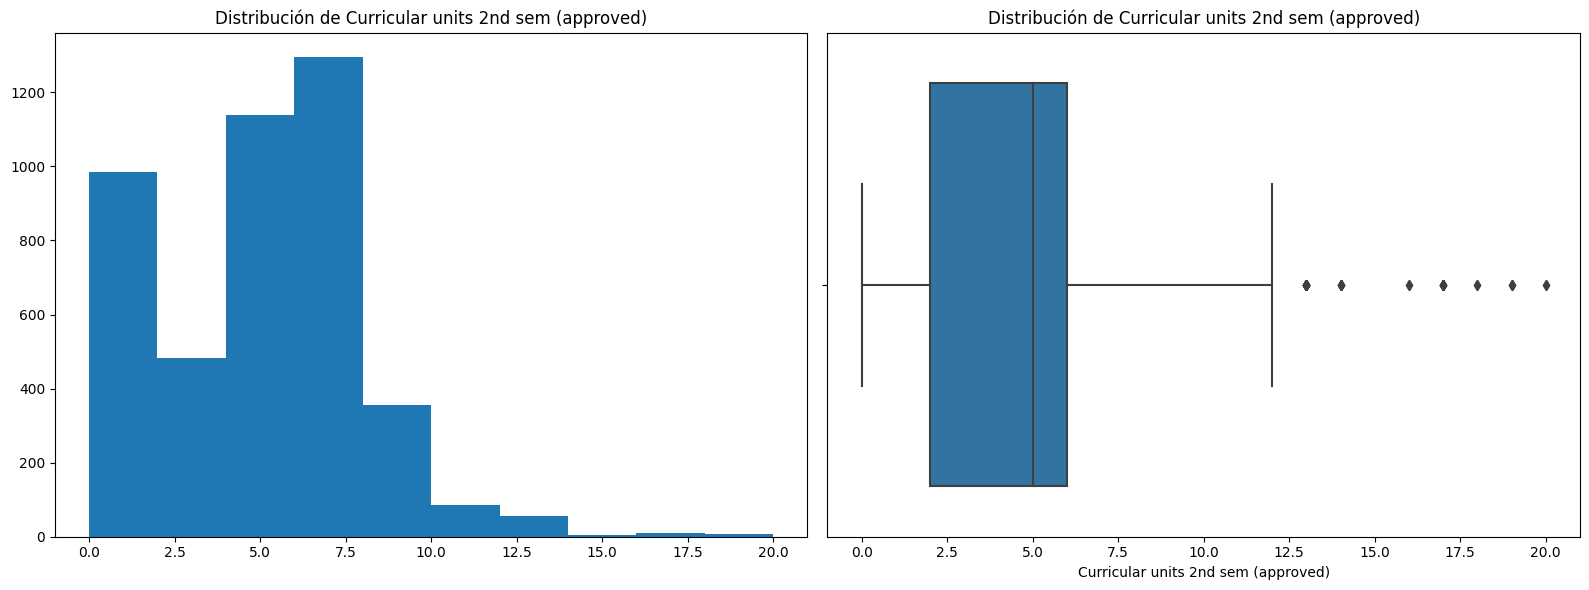

Column: Curricular units 2nd sem (grade)
Skew: -1.31
Kurtosis:  0.07
Coeficiente de variación: 0.51


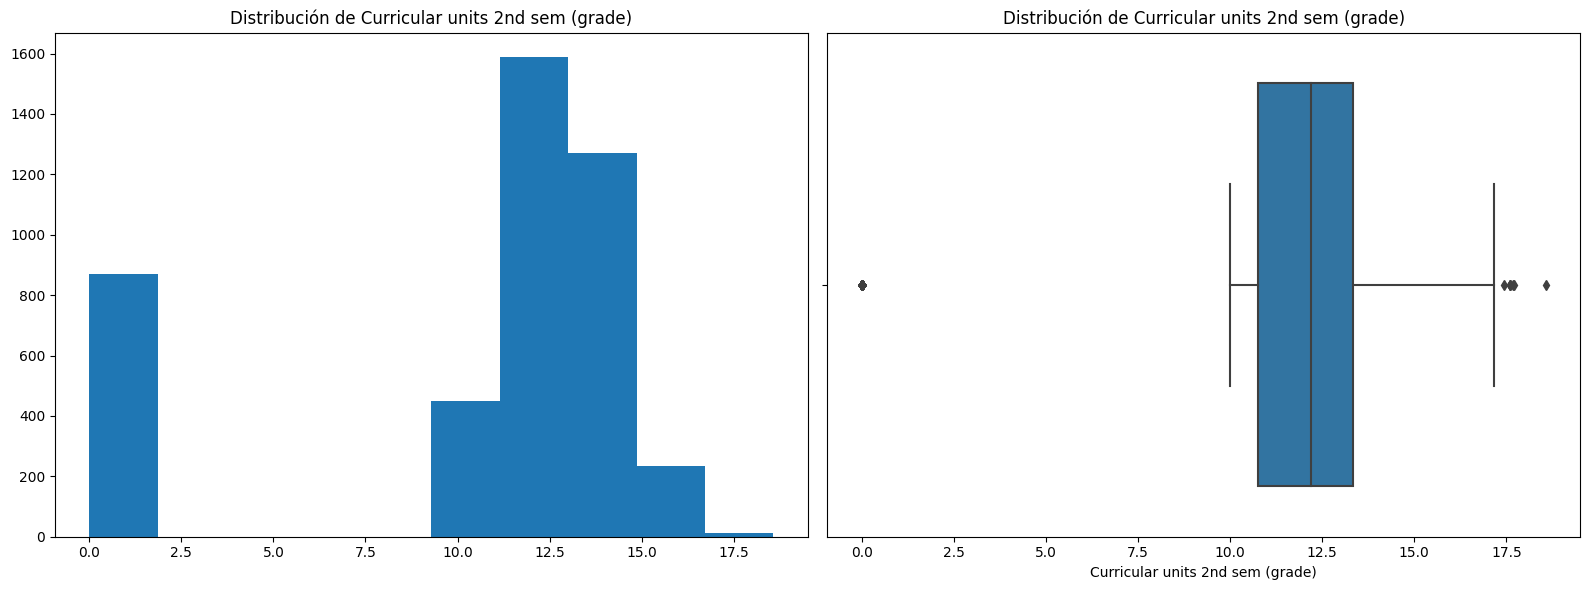

Column: Curricular units 2nd sem (without evaluations)
Skew: 7.27
Kurtosis:  66.81
Coeficiente de variación: 5.01


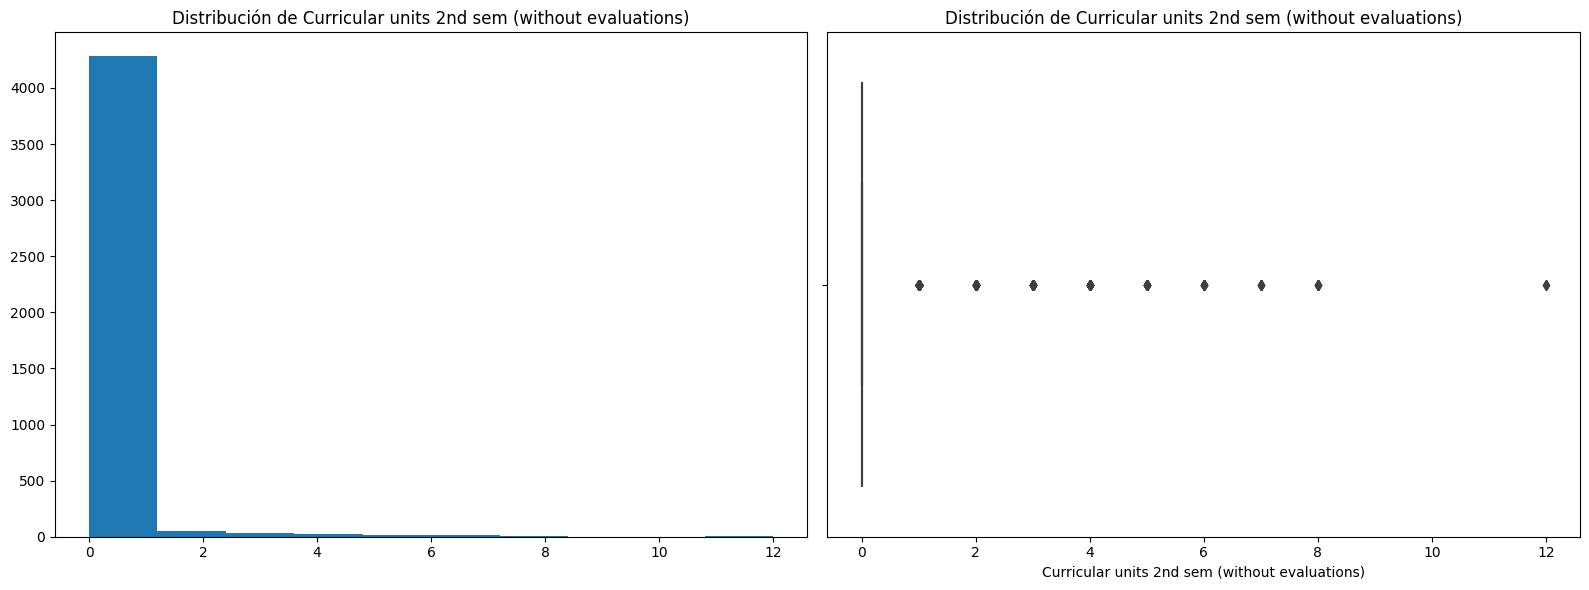

Column: Unemployment rate
Skew: 0.21
Kurtosis:  -1.0
Coeficiente de variación: 0.23


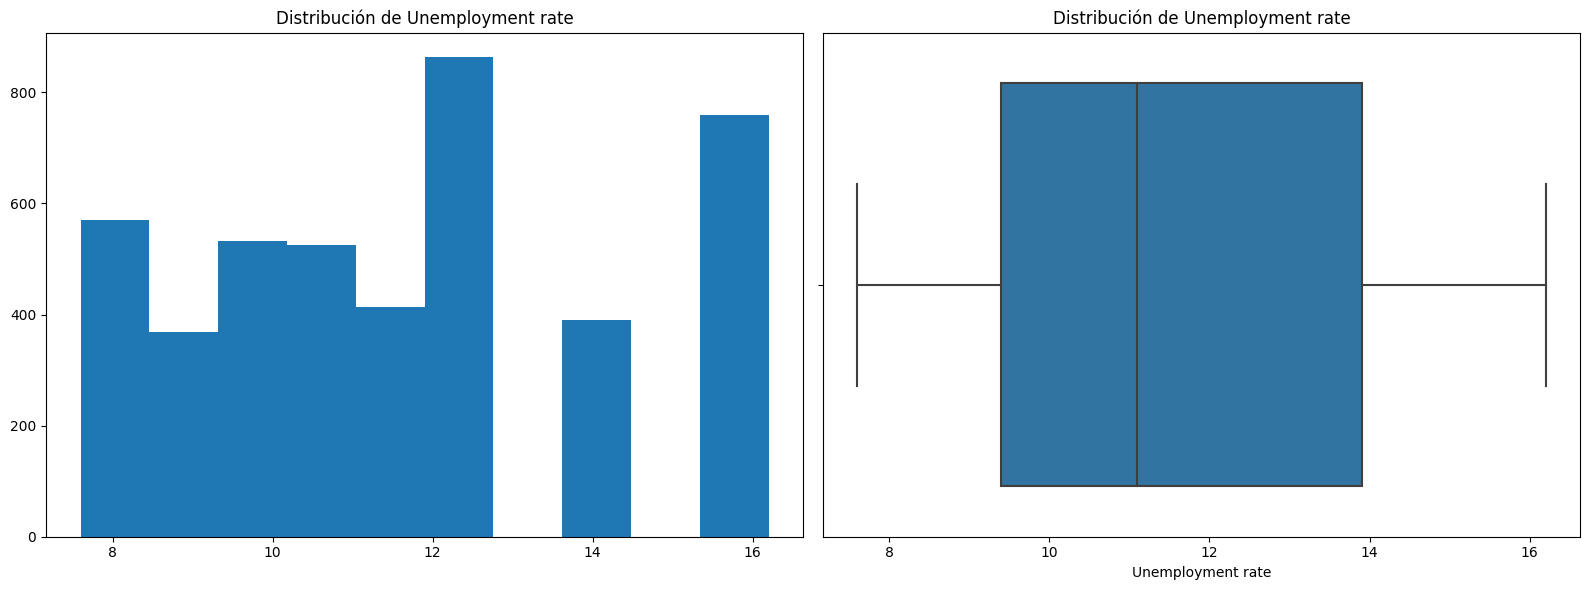

Column: Inflation rate
Skew: 0.25
Kurtosis:  -1.04
Coeficiente de variación: 1.13


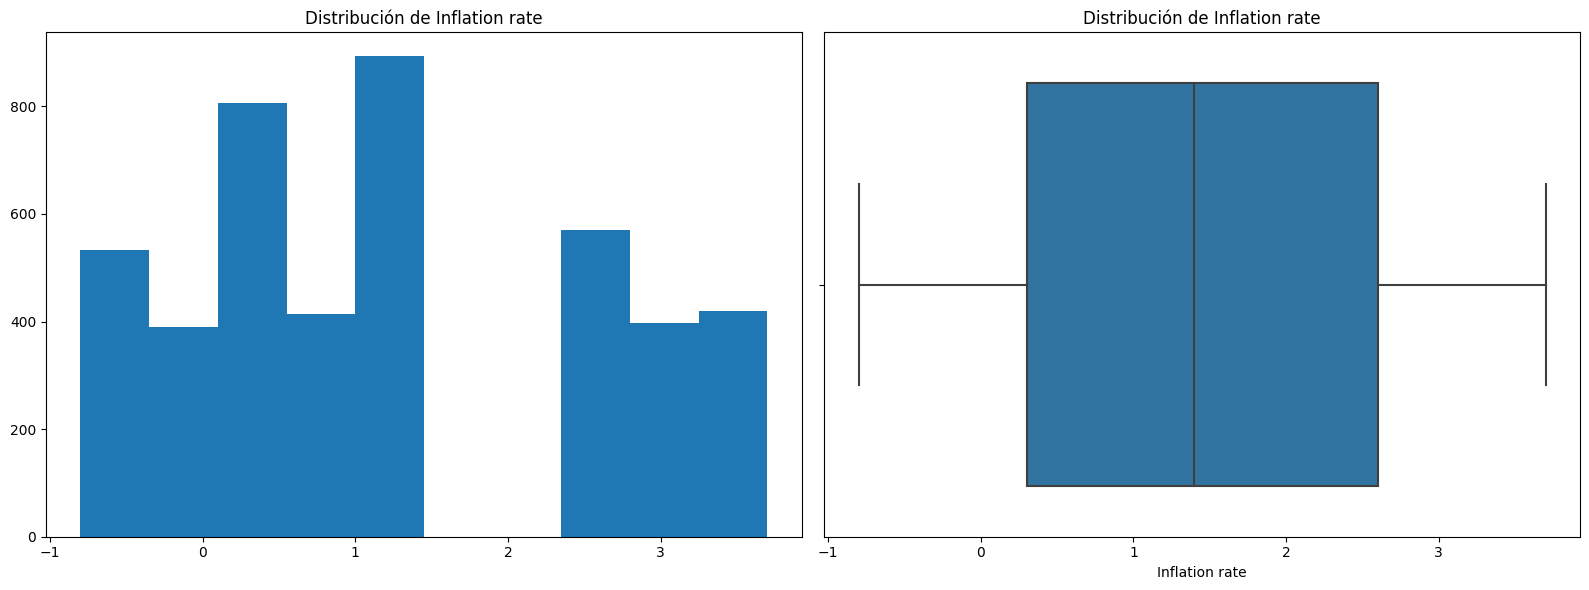

Column: GDP
Skew: -0.39
Kurtosis:  -1.0
Coeficiente de variación: 1152.82


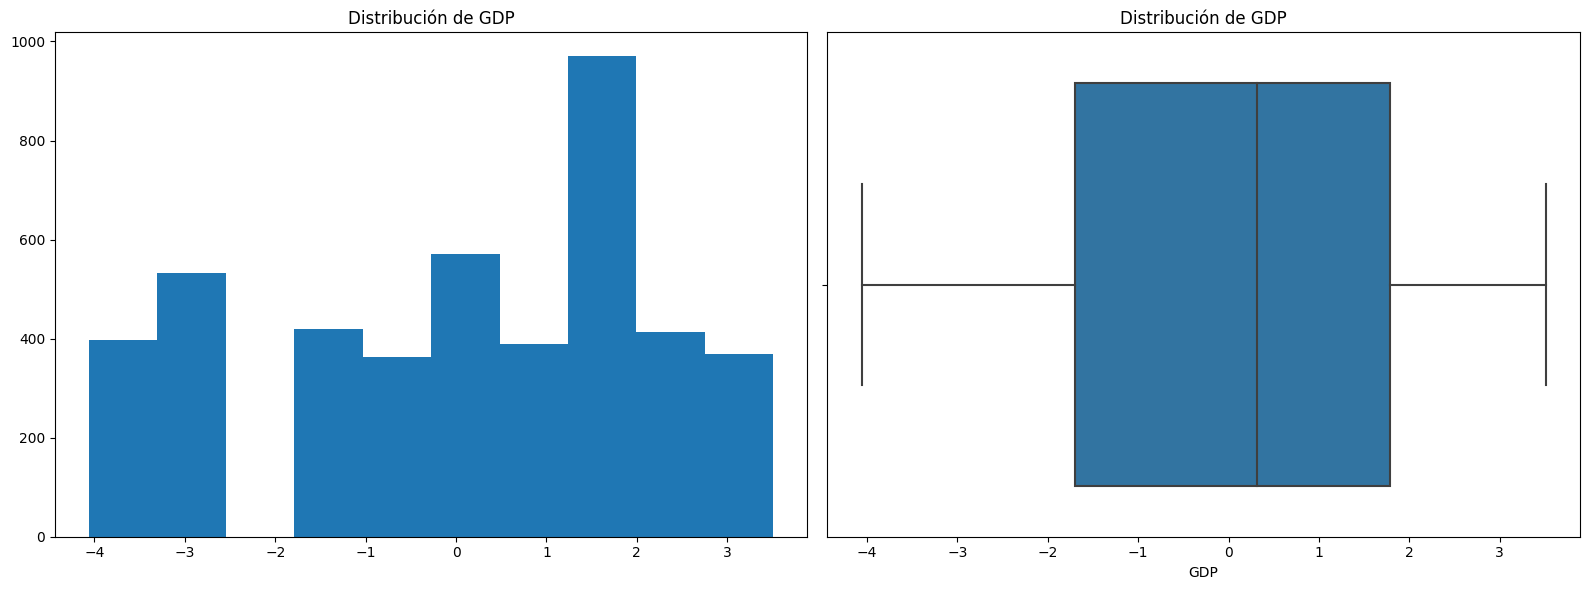

In [13]:
from scipy.stats import kurtosis

def coeficiente_variacion(data):
    return np.std(data) / np.mean(data)

for col in numericas:
    print('Column:', col)
    plt.figure(figsize=(16, 6))
    print('Skew:', round(df[col].skew(), 2))
    print('Kurtosis: ', round(df[col].kurtosis(), 2))
    cv = coeficiente_variacion(df[col])
    print(f"Coeficiente de variación: {cv:.2f}")
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.title(f'Distribución de {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.tight_layout()
    plt.show()

**Interpretación de las Variables Númericas**

- Las variables de calificación, como la calificación de admisión y la calificación de la titulación previa, presentan distribuciones que se asemejan a una campana, con la mayoría de los estudiantes concentrados en rangos de notas altos, lo que indica un fuerte rendimiento académico al ingresar. 

- Sin embargo, otras variables como la edad al matricularse y el orden de la solicitud muestran una fuerte asimetría positiva, lo que significa que la mayoría de los estudiantes son jóvenes y solicitaron su ingreso en su primera o segunda opción, pero existe una larga cola de casos atípicos (estudiantes mayores o que aplicaron en un orden superior). 

- En el ámbito académico, la distribución de las unidades curriculares acreditadas y sin evaluaciones está muy sesgada hacia cero, lo que sugiere que la mayoría de los estudiantes no tienen unidades previas acreditadas ni unidades que queden sin evaluar en el primer semestre.

- Las variables de desempeño, como las unidades inscritas, evaluadas y aprobadas, también muestran asimetría positiva, indicando que aunque la mayoría de los estudiantes se encuentran en un rango estándar, existen casos de estudiantes con una carga académica significativamente mayor. 

- La distribución de la calificación promedio del 1er semestre es particularmente interesante, ya que presenta un sesgo negativo y una concentración de valores alrededor de la media, pero también un pico notable en los valores bajos, lo que podría indicar un grupo de estudiantes con un rendimiento inicial muy bajo, posiblemente relacionado con los abandonos.

- En cuanto al segundo semestre, las distribuciones de las variables continúan reflejando patrones similares a los del primer semestre, con algunas peculiaridades. 

- La calificación promedio del segundo semestre exhibe un comportamiento bimodal o una asimetría negativa con un pico notable en las calificaciones bajas (cerca de cero) y otro pico más pronunciado en un rango alto, lo que podría indicar una polarización en el rendimiento académico. 

- Las variables de carga académica, como las unidades curriculares inscritas, evaluadas y aprobadas, tienen una asimetría positiva que sugiere que la mayoría de los estudiantes se inscriben en un número de cursos dentro de un rango típico, pero hay una minoría con cargas académicas muy altas. 

- Por su parte, la distribución de unidades acreditadas y sin evaluaciones está fuertemente sesgada hacia el cero, lo que confirma que la mayoría de los estudiantes no arrastran créditos ni dejan asignaturas sin evaluar. 

- Finalmente, los indicadores macroeconómicos como la tasa de desempleo, la tasa de inflación y el GDP presentan distribuciones más dispersas y con múltiples picos (multimodales), lo que podría reflejar fluctuaciones temporales en las condiciones económicas que contextualizan el periodo de estudio.

## Análisis Bivariado

El análisis bivariado es la segunda fase del análisis exploratorio de datos. Se enfoca en las relaciones entre dos variables para obtener datos estadísticos sobre sus influencias mutuas.

---

Se generan graficos de barras para analizar la relación entre el conjunto de variables binarias y la variable objetivo (tres categorías (abandono, matriculado y graduado)) al final de la duración normal del curso con el fin de identificar qué variables binarias están asociadas en mayores proporciones. 

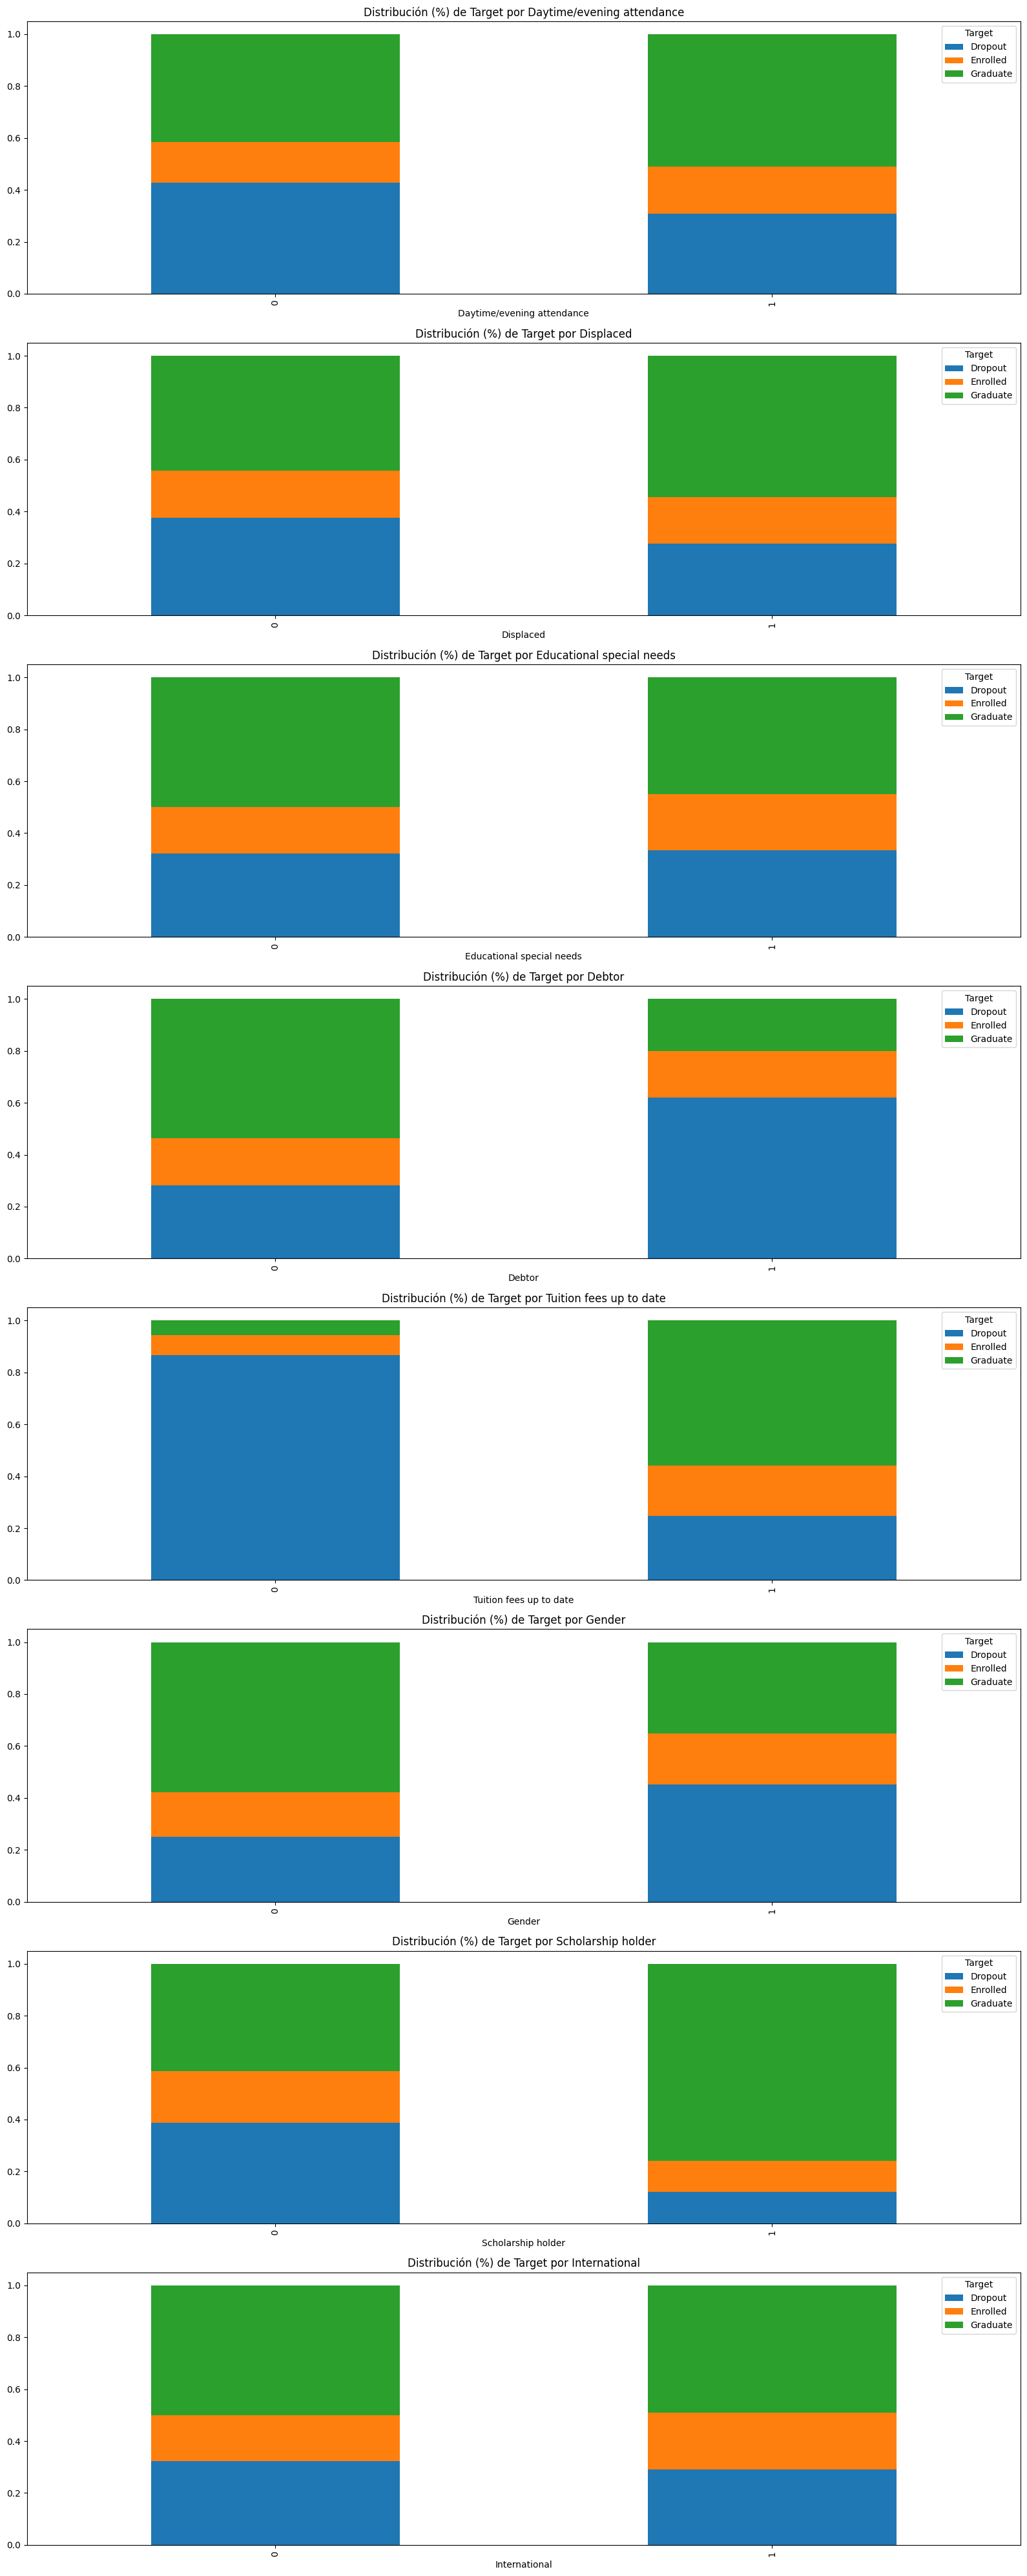

In [14]:
# Configuración del gráfico
n_vars = len(binarias)
fig, axes = plt.subplots(n_vars, 1, figsize=(16, 5*n_vars))

objetivo = "Target" 

for i, var in enumerate(binarias):
    pd.crosstab(df[var], df[objetivo], normalize='index').plot(
        kind='bar', stacked=True, ax=axes[i],
        title=f'Distribución (%) de {objetivo} por {var}'
    )
    
plt.tight_layout()
plt.show()

**Interpretación**

Las visualizaciones de la distribución de la variable objetivo por categorías binarias revelan relaciones importantes entre las características de los estudiantes y sus resultados académicos. 

- Se observa una correlación muy fuerte entre las variables financieras y el resultado final: los estudiantes que son deudores o que no tienen sus matrículas al día presentan tasas de abandono significativamente más altas y tasas de graduación notablemente más bajas en comparación con sus contrapartes. 

- De manera similar, los becarios tienen una probabilidad de graduación considerablemente mayor y una tasa de abandono mucho menor. 

- Por otro lado, la asistencia diurna/nocturna y el género parecen tener una influencia menor, aunque el género femenino muestran tasas de graduación ligeramente más altas. 

- Por último, variables como el estatus de desplazamiento, las necesidades educativas especiales y el estatus de estudiante internacional no muestran diferencias notables en la distribución de los resultados académicos, lo que sugiere que estas características no son factores predictores fuertes del abandono, la graduación o la continuidad en los estudios.

--- 

Se generan graficos de barras para analizar la relación entre el conjunto de variables categóricas y la variable objetivo (tres categorías (abandono, matriculado y graduado)) al final de la duración normal del curso con el fin de identificar qué variables categóricas están asociadas en mayores proporciones. 

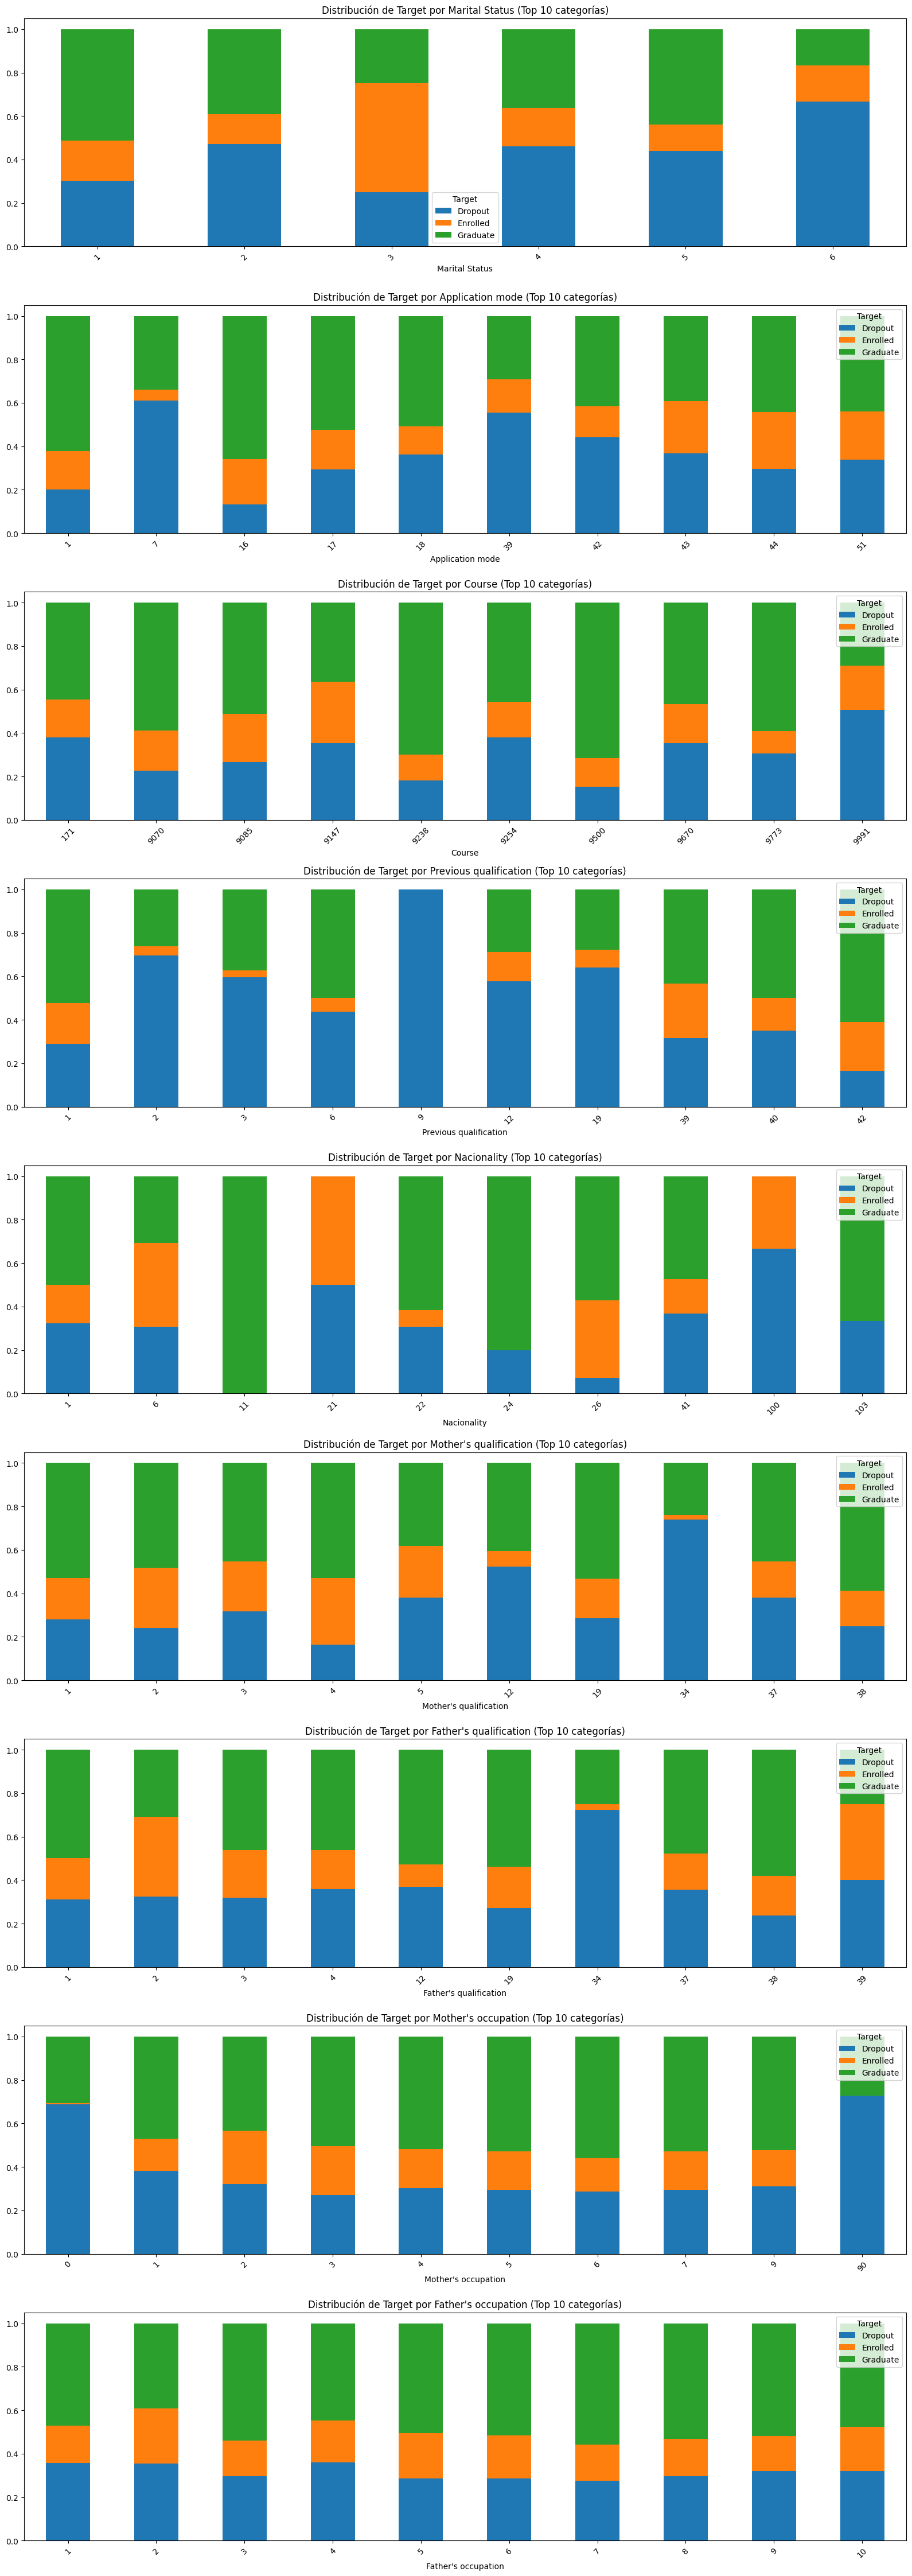

In [15]:
# Configuración del gráfico
n_vars = len(categoricas)
fig, axes = plt.subplots(n_vars, 1, figsize=(16, 5*n_vars))

objetivo = "Target"  

for i, col in enumerate(categoricas):
    # Obtener las 10 categorías con más conteos
    top_categories = df[col].value_counts().nlargest(10).index
    
    # Filtrar el dataframe para incluir solo las top 10 categorías
    df_filtered = df[df[col].isin(top_categories)]
    
    pd.crosstab(df_filtered[col], df_filtered[objetivo], normalize='index').plot(
        kind='bar', 
        stacked=True, 
        ax=axes[i],
        title=f'Distribución de {objetivo} por {col} (Top 10 categorías)',
        color=['#1f77b4', '#ff7f0e', '#2ca02c']  
    )
    
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

**Interpretación**

Las visualizaciones de la distribución de la variable objetivo en las principales categorías de diversas variables revelan que, si bien la mayoría de las características no muestran una correlación drástica, existen algunas diferencias notables. 

- La distribución de los resultados (Abandono, Matriculado, Graduado) parece ser bastante consistente a través de la mayoría de las categorías de Estado Civil, Modo de Solicitud, Nacionalidad, Ocupación de la Madre y Ocupación del Padre. Esto sugiere que la categoría específica dentro de estas variables no es un predictor fuerte y aislado del éxito académico. 

- Sin embargo, la variable Curso muestra una mayor variación; algunas de las categorías de cursos principales tienen una proporción de graduados visiblemente más alta que otras, lo que implica que el campo de estudio elegido podría ser un factor influyente en el resultado del estudiante.

En la mayoria de variables categóricas sucede una inconsistencia en el porcentaje de (Dropout, Enrolled, Graduate) esto se debe a la concentración de la mayoria de los datos en unas pocas categorías, lo que provoca cambios bruscos en la proporción de la variable objetivo con respecto a la variable categórica estudiada. Por ejemplo, en una categoría en específico dentro de una variable puede registrarse que el 60% de las pocas muestras han abandonado, mientras que en la siguiente categoría el 30% ha abandonado por lo tanto la proporción caería considerablemente. Este fenómeno refleja una la alta variabilidad en categorías con baja densidad de muestras, lo que dificulta la interpretación de tendencias. 

---

Se generan graficos cajas y bigotes para analizar la relación entre el conjunto de variables númericas y la variable objetivo (tres categorías (abandono, matriculado y graduado)) al final de la duración normal del curso con el fin de identificar qué variables númericas están asociadas en mayores proporciones y verificar sus distribuciones. 

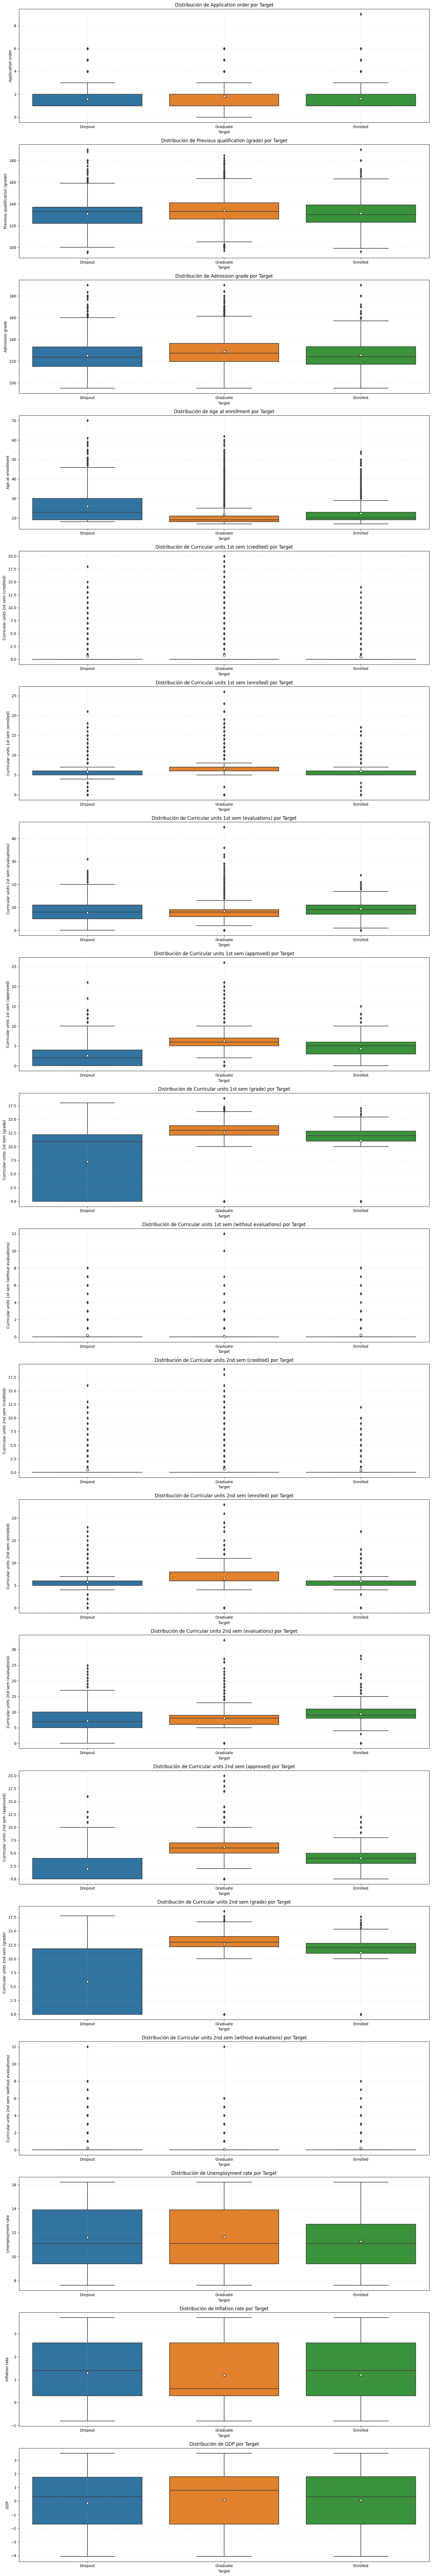

In [16]:
# Configuración
n_vars = len(numericas)
fig, axes = plt.subplots(n_vars, 1, figsize=(16, 5*n_vars))
objetivo = "Target"

for i, var in enumerate(numericas):
    sns.boxplot(
        data=df,
        x=objetivo,
        y=var,
        ax=axes[i],
        palette=['#1f77b4', '#ff7f0e', '#2ca02c'],
        showmeans=True,
        meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black"}
    )
    axes[i].set_title(f'Distribución de {var} por {objetivo}')
    axes[i].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

---

Se generan histogramas para analizar la relación entre el conjunto de variables númericas y la variable objetivo (tres categorías (abandono, matriculado y graduado)) al final de la duración normal del curso con el fin de identificar qué variables númericas están asociadas en mayores proporciones y verificar sus distribuciones. 

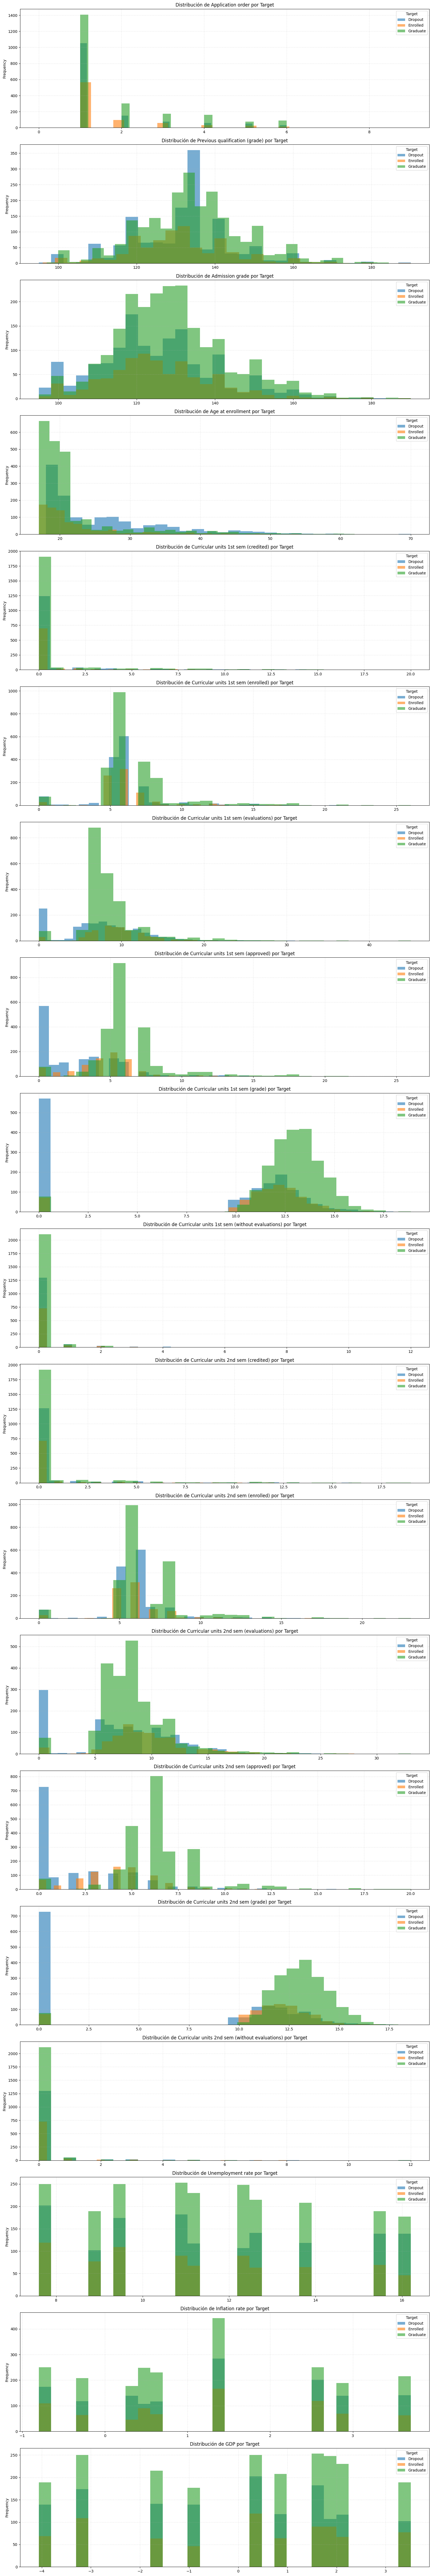

In [17]:
# Configuración
fig, axes = plt.subplots(n_vars, 1, figsize=(16, 5*n_vars))
objetivo = "Target"

for i, var in enumerate(numericas):
    # Crear histograma apilado
    df.groupby(objetivo)[var].plot(
        kind='hist',
        bins=30,
        alpha=0.6,
        ax=axes[i],
        legend=True,
        stacked=True
    )
    
    axes[i].set_title(f'Distribución de {var} por {objetivo}')
    axes[i].grid(True, linestyle='--', alpha=0.3)
    axes[i].legend(title=objetivo)

plt.tight_layout()
plt.show()

## Análisis Multivariado

Para identificar relaciones lineales entre las variables del Dataset, se generó una matriz de correlación mediante un heatmap. Este gráfico muestra el coeficiente de correlación de Pearson (rango: -1 a 1) entre cada par de variables, utilizando una escala de colores (azul para correlaciones negativas, rojo para positivas). Los valores numéricos anotados permiten evaluar posibles dependencias entre variables.

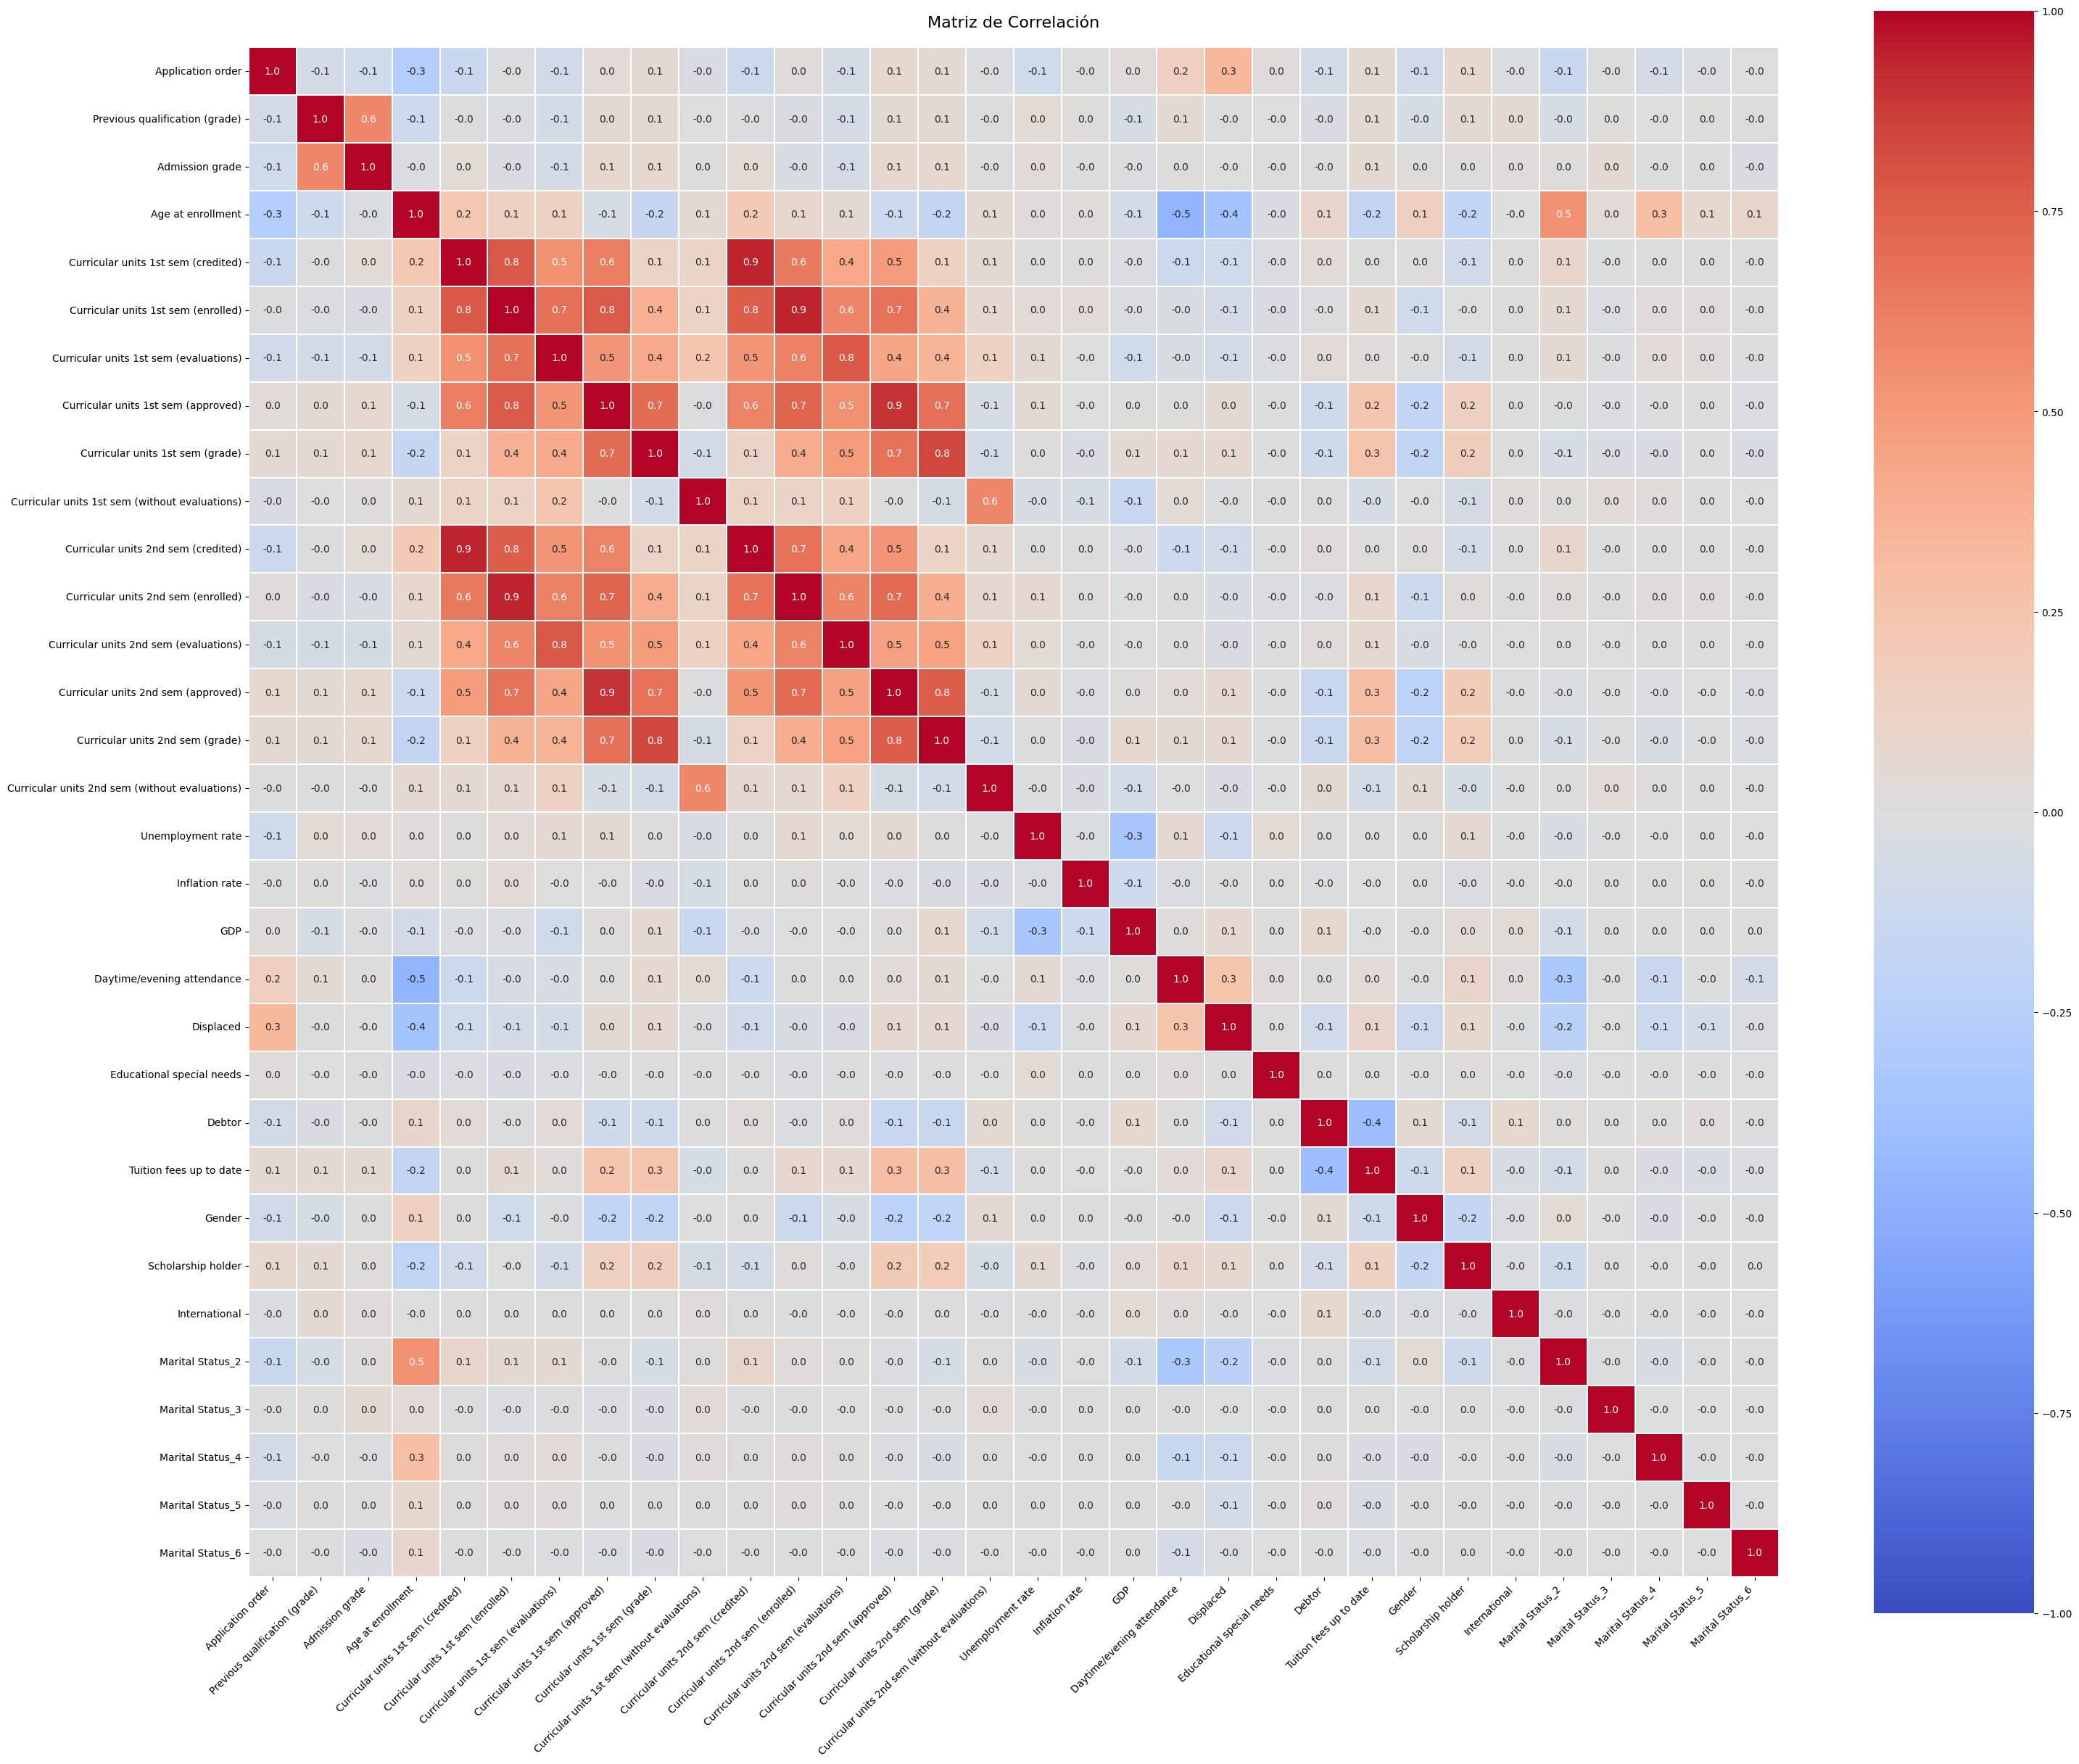

In [18]:
from sklearn.preprocessing import OneHotEncoder

def plot_enhanced_heatmap(data, numeric_vars=[], binary_vars=[], categorical_vars=[], figsize=(30, 30)):
    df = data.copy()
    
    if categorical_vars:
        categorical_vars = [cat for cat in categorical_vars if df[cat].nunique() < 10]
        
        encoder = OneHotEncoder(drop='first', sparse_output=False)
        encoded_cats = encoder.fit_transform(df[categorical_vars])
        encoded_cols = encoder.get_feature_names_out(categorical_vars)
        encoded_df = pd.DataFrame(encoded_cats, columns=encoded_cols, index=df.index)
        df = pd.concat([df.drop(columns=categorical_vars), encoded_df], axis=1)
    
    all_vars = numeric_vars + binary_vars + (list(encoded_cols) if categorical_vars else [])
    corr_matrix = df[all_vars].corr()
    
    plt.figure(figsize=figsize)
    
    n_vars = len(all_vars)
    line_width = 0.5 if n_vars < 30 else 0.3
    font_size = max(6, 12 - int(n_vars/15))
    
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".1f",          
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        linewidths=line_width,  
        linecolor='white',      
        square=True,            
        cbar_kws={"shrink": 0.75, "aspect": 10},  
        annot_kws={"size": font_size}
    )
    

    plt.title("Matriz de Correlación", pad=20, fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=font_size)
    plt.yticks(rotation=0, fontsize=font_size)
    
    
    plt.tight_layout()
    plt.show()

plot_enhanced_heatmap(df,numericas,binarias,categoricas)

**Interpretación**

Observando la matriz, se puede apreciar que la mayoría de las variables muestran correlaciones débiles, con valores cercanos a cero. Sin embargo, hay algunas excepciones notables. Por ejemplo, las variables relacionadas con el `Curricular units` ("unidades curriculares") parecen estar fuertemente correlacionadas entre sí. Específicamente, hay un bloque prominente de correlaciones positivas y fuertes entre las variables `Curricular units 1st sem (approved)`, `Curricular units 1st sem (grade)` y `Curricular units 1st sem (evaluations)`. Esto sugiere que el rendimiento en la primera mitad del semestre está altamente relacionado entre sí. De manera similar, las variables `Curricular units 2nd sem...` también muestran un patrón similar de fuertes correlaciones positivas.

Por otro lado, se observan algunas correlaciones negativas. Por ejemplo, la variable `Unemployment rate` parece tener una correlación negativa débil con varias otras variables. En resumen, la matriz de correlación indica que, si bien la mayoría de las variables no tienen una fuerte relación lineal, hay un grupo de variables relacionadas con las unidades curriculares que sí están fuertemente interconectadas, lo que es un hallazgo importante para el análisis de los datos.

---

A continuación, se muestra una tabla con los resultados de un Análisis de Varianza (ANOVA) unidireccional que compara cada variable numérica con una variable categórica de destino ('Target'). El ANOVA se utiliza para determinar si existen diferencias estadísticamente significativas entre las medias de dos o más grupos. La tabla está ordenada de mayor a menor según el valor del estadístico F, que mide la diferencia entre las varianzas de los grupos. Un valor F más alto, junto con un valor p bajo, indica que las medias de los grupos son significativamente diferentes.

In [19]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd

results = []
for col in numericas:
    groups = [df[col][df['Target'] == category] for category in df['Target'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    results.append({
        'Variable': col,
        'F-statistic': f_stat,
        'p-value': p_value,
        'Significativa (p < 0.05)': p_value < 0.05
    })

# 3. Resultados ANOVA (ordenados por p-value)
results_df = pd.DataFrame(results).sort_values(by='p-value')
print("Resultados ANOVA:")
print(results_df)

# 4. Post-hoc Tukey HSD (solo si ANOVA es significativo)
if any(results_df['Significativa (p < 0.05)']):
    print("\n--- Análisis Post-Hoc (Tukey HSD) ---")
    for col in results_df[results_df['Significativa (p < 0.05)']]['Variable']:
        print(f"\nVariable: {col}")
        tukey = pairwise_tukeyhsd(endog=df[col], groups=df['Target'], alpha=0.05)
        print(tukey.summary())

Resultados ANOVA:
                                          Variable  F-statistic  \
14                Curricular units 2nd sem (grade)  1134.109544   
13             Curricular units 2nd sem (approved)  1410.732938   
7              Curricular units 1st sem (approved)   859.866768   
8                 Curricular units 1st sem (grade)   713.517328   
3                                Age at enrollment   154.712071   
12          Curricular units 2nd sem (evaluations)    87.801092   
11             Curricular units 2nd sem (enrolled)    75.591910   
5              Curricular units 1st sem (enrolled)    59.467391   
6           Curricular units 1st sem (evaluations)    37.527840   
2                                  Admission grade    35.648604   
1                   Previous qualification (grade)    27.728589   
15  Curricular units 2nd sem (without evaluations)    20.185531   
0                                Application order    19.727174   
9   Curricular units 1st sem (without evalua

**Interpretaión**

El análisis ANOVA realizado revela diferencias estadísticamente significativas (p < 0.05) entre los grupos definidos por la variable categórica `Target` para todas las variables numéricas analizadas. Los resultados destacan que las variables relacionadas con el rendimiento académico muestran las diferencias más pronunciadas. 

- En particular, `Curricular units 2nd sem (approved)` (F = 1410.73) y `Curricular units 2nd sem (grade)` (F = 1134.11) presentan los mayores valores de F-statistic, lo que indica una variabilidad significativa entre los grupos en estas métricas de aprobación y calificaciones del segundo semestre. 

- Le siguen en importancia las variables del primer semestre, como `Curricular units 1st sem (approved)` (F = 859.87) y `Curricular units 1st sem (grade)` (F = 713.52), sugiriendo que el rendimiento académico en ambos semestres es un factor crítico de diferenciación entre los grupos.

- La variable `Age at enrollment` (F = 154.71) también muestra diferencias significativas, aunque menos marcadas que las académicas, lo que podría indicar que la edad al matricularse influye en el comportamiento del `Target`. 

- Otras variables como el número de unidades curriculares matriculadas o evaluadas en ambos semestres, así como la `Admission grade` (F = 35.65) y la `Previous qualification (grade)` (F = 27.73), presentan efectos moderados pero aún relevantes. 

- En contraste, variables macroeconómicas como `Unemployment rate` (F = 5.92), `GDP` (F = 4.80) e `Inflation rate` (F = 1.74) exhiben las diferencias menos significativas, lo que sugiere que estos factores externos tienen un impacto limitado en la variable `Target` en comparación con los factores académicos y demográficos. 

En resumen, los resultados subrayan que el rendimiento académico (aprobaciones y calificaciones) es el principal discriminante entre los grupos, seguido por características individuales como la edad y el historial académico previo. Estos hallazgos podrían orientar intervenciones específicas centradas en mejorar el desempeño en las unidades curriculares críticas identificadas.